# Business Understanding

## Business Background
Olist is a Brazilian online marketplace that connects small and medium-sized businesses to major e-commerce platforms. Olist handles listings, logistics, and customer management.

They provide services like:
- Integrating small merchants into larger platforms (like Mercado Livre, etc.)
- Handling customer orders, payments, and deliveries
- Managing post-sale processes such as reviews and refunds

Merchants/ sellers are Olist supply side and customers are in the demand side.
The existence of both merchants and customers support Olist business because Olist as the platform bridge the merchants and customers.

## Problem Statements

As the supply, merchants/ sellers play big part to fulfill the demands (customer needs/ wants) and they also contribute to the sustainability of the business.

However, if the sellers no longer continue selling their products through Olist, it could affect the Olist business balance and possibly lead to greater causes.


If the seller choose to stop/ churn from Olist, their decision might affect the product variability and availabilty which could drive to product limitation. Which possibly cause the delivery takes longer time for certain customers because the merchant/ sellers provide the product they need are fewer and might far away from their state/ location. This could possibly leads to fewer puchase that leads to revenue decrease also customers churning.


Most of times, retaining merchants/ sellers (also applied for customers) is cheaper than acquiring new ones.



So, we need to ***predict and prevent the sellers churning in order to retain the existent merchants and balanced ecosystem***.


With analyzing sellers churns, we could also gain some insights for the business development because it possibly reveals operational friction, profit margin issues, or platform dissatifaction.

## Analysis Objectives

1. Identify if financial or operational struggles precede churn (Seller performance, Sales volume & value, product performance)
2. Analyze does the poor seller performance directly impact the customer experience and sellers churn (Customer satisfaction - review score, delivery & fulfillment performance)
3. Identify main churn drivers (seller location, distance, reviews, etc.).
4. Predict the sellers churning with classification model in machine learning.
5. Suggest and recommendation for retaining existing sellers and preventing sellers churning.

# Data

## Data Introduction

Dataset :

Dataset involved & its primary use:
- orders_dataset = Core dataset for measuring delivery delays and fulfillment rates.
- order_items_dataset = Links orders to sellers, freight cost, and items sold.
- sellers_dataset = Used to locate seller origins and analyze regional performance.
- customer_dataset = Used for customer destination regions.
- geolocation_dataset = Used for calculating distances between seller and customer.
- reviews_dataset = Used to get the rating score for each orders delivered.
product_dataset (optional) = Can analyze effect of product weight or category on delay probability





In [ ]:

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas textblob scikit-learn matplotlib openpyxl deep-translator wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

orders_df = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT PROGRESS!!/DATASET/olist_orders_dataset.csv')
order_items_df = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT PROGRESS!!/DATASET/olist_order_items_dataset.csv')
sellers_df = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT PROGRESS!!/DATASET/olist_sellers_dataset.csv')
customers_df = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT PROGRESS!!/DATASET/olist_customers_dataset.csv')
geolocation_df = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT PROGRESS!!/DATASET/olist_geolocation_dataset.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT PROGRESS!!/DATASET/olist_order_reviews_dataset.csv')
products_df = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT PROGRESS!!/DATASET/olist_products_dataset.csv')
product_cat_df = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT PROGRESS!!/DATASET/product_category_name_translation.csv')
payments_df = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT PROGRESS!!/DATASET/olist_order_payments_dataset.csv')

print("Datasets loaded successfully.")

Datasets loaded successfully.


In [ ]:
# Set display options for better visibility
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
sns.set_style('whitegrid')

## Data Understanding

### Orders Dataset

In [ ]:
# Checking orders dataset
display(orders_df.head())
orders_df.info()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# Checking Unique Values for Each Columns
print("\nUnique Values and Counts per Column")
for col in orders_df.columns:
    print(f"\nColumn: {col}")
    unique_values = orders_df[col].unique()
    num_unique = orders_df[col].nunique()

    print(f"Number of unique values: {num_unique}")

    # Print unique values, but limit the output for columns with many unique values
    if num_unique > 20:
        print(f"Sample unique values: {unique_values[:20]}...")
    else:
        print(f"Unique values: {unique_values}")


Unique Values and Counts per Column

Column: order_id
Number of unique values: 99441
Sample unique values: ['e481f51cbdc54678b7cc49136f2d6af7' '53cdb2fc8bc7dce0b6741e2150273451'
 '47770eb9100c2d0c44946d9cf07ec65d' '949d5b44dbf5de918fe9c16f97b45f8a'
 'ad21c59c0840e6cb83a9ceb5573f8159' 'a4591c265e18cb1dcee52889e2d8acc3'
 '136cce7faa42fdb2cefd53fdc79a6098' '6514b8ad8028c9f2cc2374ded245783f'
 '76c6e866289321a7c93b82b54852dc33' 'e69bfb5eb88e0ed6a785585b27e16dbf'
 'e6ce16cb79ec1d90b1da9085a6118aeb' '34513ce0c4fab462a55830c0989c7edb'
 '82566a660a982b15fb86e904c8d32918' '5ff96c15d0b717ac6ad1f3d77225a350'
 '432aaf21d85167c2c86ec9448c4e42cc' 'dcb36b511fcac050b97cd5c05de84dc3'
 '403b97836b0c04a622354cf531062e5f' '116f0b09343b49556bbad5f35bee0cdf'
 '85ce859fd6dc634de8d2f1e290444043' '83018ec114eee8641c97e08f7b4e926f']...

Column: customer_id
Number of unique values: 99441
Sample unique values: ['9ef432eb6251297304e76186b10a928d' 'b0830fb4747a6c6d20dea0b8c802d7ef'
 '41ce2a54c0b03bf3443c3d931a36708

#### Checking Missing Values

In [ ]:
print("\nChecking for Missing Values")
print(orders_df.isnull().sum())


Checking for Missing Values
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


#### Checking Duplicates

In [ ]:
print("\nChecking for Duplicate Rows")
duplicate_rows_orders = orders_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_orders}")


Checking for Duplicate Rows
Number of duplicate rows: 0


### Sellers Dataset

In [ ]:
# Checking sellers dataset
display(sellers_df.head())
sellers_df.info()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# Checking Unique Values for Each Columns
print("\nUnique Values and Counts per Column")
for col in sellers_df.columns:
    print(f"\nColumn: {col}")
    unique_values = sellers_df[col].unique()
    num_unique = sellers_df[col].nunique()

    print(f"Number of unique values: {num_unique}")

    # Print unique values, but limit the output for columns with many unique values
    if num_unique > 20:
        print(f"Sample unique values: {unique_values[:20]}...")
    else:
        print(f"Unique values: {unique_values}")


Unique Values and Counts per Column

Column: seller_id
Number of unique values: 3095
Sample unique values: ['3442f8959a84dea7ee197c632cb2df15' 'd1b65fc7debc3361ea86b5f14c68d2e2'
 'ce3ad9de960102d0677a81f5d0bb7b2d' 'c0f3eea2e14555b6faeea3dd58c1b1c3'
 '51a04a8a6bdcb23deccc82b0b80742cf' 'c240c4061717ac1806ae6ee72be3533b'
 'e49c26c3edfa46d227d5121a6b6e4d37' '1b938a7ec6ac5061a66a3766e0e75f90'
 '768a86e36ad6aae3d03ee3c6433d61df' 'ccc4bbb5f32a6ab2b7066a4130f114e3'
 '8cb7c5ddf41f4d506eba76e9a4702a25' 'a7a9b880c49781da66651ccf4ba9ac38'
 '8bd0f31cf0a614c658f6763bd02dea69' '05a48cc8859962767935ab9087417fbb'
 '7b8e8ec35bad4b0ef7e3963650b0a87b' '1444c08e64d55fb3c25f0f09c07ffcf2'
 '166e8f1381e09651983c38b1f6f91c11' 'e38db885400cd35c71dfd162f2c1dbcf'
 'd2e753bb80b7d4faa77483ed00edc8ca' 'f9ec7093df3a7b346b7bcf7864069ca3']...

Column: seller_zip_code_prefix
Number of unique values: 2246
Sample unique values: [13023 13844 20031  4195 12914 20920 55325 16304  1529 80310 75110 13530
  1222  5372 88705 42

#### Checking Missing Values

In [ ]:
print("\nChecking for Missing Values")
print(sellers_df.isnull().sum())


Checking for Missing Values
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


#### Checking Duplicates

In [ ]:
print("\nChecking for Duplicate Rows")
duplicate_rows_sellers = sellers_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_sellers}")


Checking for Duplicate Rows
Number of duplicate rows: 0


### Customers Dataset

In [ ]:
# Checking customers dataset
display(customers_df.head())
customers_df.info()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# Checking Unique Values for Each Columns
print("\nUnique Values and Counts per Column")
for col in customers_df.columns:
    print(f"\nColumn: {col}")
    unique_values = customers_df[col].unique()
    num_unique = customers_df[col].nunique()

    print(f"Number of unique values: {num_unique}")

    # Print unique values, but limit the output for columns with many unique values
    if num_unique > 20:
        print(f"Sample unique values: {unique_values[:20]}...")
    else:
        print(f"Unique values: {unique_values}")


Unique Values and Counts per Column

Column: customer_id
Number of unique values: 99441
Sample unique values: ['06b8999e2fba1a1fbc88172c00ba8bc7' '18955e83d337fd6b2def6b18a428ac77'
 '4e7b3e00288586ebd08712fdd0374a03' 'b2b6027bc5c5109e529d4dc6358b12c3'
 '4f2d8ab171c80ec8364f7c12e35b23ad' '879864dab9bc3047522c92c82e1212b8'
 'fd826e7cf63160e536e0908c76c3f441' '5e274e7a0c3809e14aba7ad5aae0d407'
 '5adf08e34b2e993982a47070956c5c65' '4b7139f34592b3a31687243a302fa75b'
 '9fb35e4ed6f0a14a4977cd9aea4042bb' '5aa9e4fdd4dfd20959cad2d772509598'
 'b2d1536598b73a9abd18e0d75d92f0a3' 'eabebad39a88bb6f5b52376faec28612'
 '1f1c7bf1c9b041b292af6c1c4470b753' '206f3129c0e4d7d0b9550426023f0a08'
 'a7c125a0a07b75146167b7f04a7f8e98' 'c5c61596a3b6bd0cee5766992c48a9a1'
 '9b8ce803689b3562defaad4613ef426f' '49d0ea0986edde72da777f15456a0ee0']...

Column: customer_unique_id
Number of unique values: 96096
Sample unique values: ['861eff4711a542e4b93843c6dd7febb0' '290c77bc529b7ac935b93aa66c333dc3'
 '060e732b5b29e8181a182

#### Checking Missing Values

In [ ]:
print("\nChecking for Missing Values")
print(customers_df.isnull().sum())


Checking for Missing Values
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


#### Checking Duplicates

In [ ]:
print("\nChecking for Duplicate Rows")
duplicate_rows_customers = customers_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_customers}")


Checking for Duplicate Rows
Number of duplicate rows: 0


### Geolocation Dataset

In [ ]:
# Checking geolocation dataset
display(geolocation_df.head())
geolocation_df.info()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
# Checking Unique Values for Each Columns
print("\nUnique Values and Counts per Column")
for col in geolocation_df.columns:
    print(f"\nColumn: {col}")
    unique_values = geolocation_df[col].unique()
    num_unique = geolocation_df[col].nunique()

    print(f"Number of unique values: {num_unique}")

    # Print unique values, but limit the output for columns with many unique values
    if num_unique > 20:
        print(f"Sample unique values: {unique_values[:20]}...")
    else:
        print(f"Unique values: {unique_values}")


Unique Values and Counts per Column

Column: geolocation_zip_code_prefix
Number of unique values: 19015
Sample unique values: [1037 1046 1041 1035 1012 1047 1013 1029 1011 1032 1014 1039 1024 1009
 1020 1043 1050 1045 1007 1005]...

Column: geolocation_lat
Number of unique values: 717360
Sample unique values: [-23.54562128 -23.54608113 -23.54612897 -23.54439216 -23.54157796
 -23.5477623  -23.54627311 -23.54692321 -23.54376906 -23.54763955
 -23.54732513 -23.5384181  -23.54643534 -23.54894599 -23.54518734
 -23.54188301 -23.54138952 -23.5469354  -23.54588428 -23.54516589]...

Column: geolocation_lng
Number of unique values: 717613
Sample unique values: [-46.63929205 -46.6448203  -46.64295148 -46.63949931 -46.64160722
 -46.63536054 -46.64122517 -46.6342637  -46.63427784 -46.63603162
 -46.63418379 -46.63477838 -46.63383023 -46.63467113 -46.63785524
 -46.63991947 -46.62989909 -46.63658793 -46.64316319 -46.6437858 ]...

Column: geolocation_city
Number of unique values: 8011
Sample unique val

#### Checking Missing Value

In [ ]:
print("\nChecking for Missing Values")
print(geolocation_df.isnull().sum())


Checking for Missing Values
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


#### Checking Duplicates

In [ ]:
print("\nChecking for Duplicate Rows")
duplicate_rows_geolocation = geolocation_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_geolocation}")


Checking for Duplicate Rows
Number of duplicate rows: 261831


In [ ]:
print("\nSample Duplicate Rows")
duplicate_rows = geolocation_df[geolocation_df.duplicated(keep=False)]
display(duplicate_rows.head())


Sample Duplicate Rows


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP


### Order Items Dataset

In [ ]:
# Checking order items dataset
order_items_df.head(5)
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### Checking Missing Values

In [ ]:
print("\nChecking for Missing Values")
print(order_items_df.isnull().sum())


Checking for Missing Values
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


#### Checking Duplicates

In [ ]:
print("\nChecking for Duplicate Rows")
duplicate_rows_order_items = order_items_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_order_items}")


Checking for Duplicate Rows
Number of duplicate rows: 0


### Products Dataset

In [ ]:
# Checking customers dataset
display(products_df.head())
products_df.info()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### Checking Missing Values

In [ ]:
print("\nChecking for Missing Values")
print(products_df.isnull().sum())


Checking for Missing Values
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


#### Checking Duplicates

In [ ]:
print("\nChecking for Duplicate Rows")
duplicate_rows_products = products_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_products}")


Checking for Duplicate Rows
Number of duplicate rows: 0


In [ ]:
products_df = products_df.merge(product_cat_df,on='product_category_name',how="left")
products_df.isnull().count()

,0
product_id,32951
product_category_name,32951
product_name_lenght,32951
product_description_lenght,32951
product_photos_qty,32951
product_weight_g,32951
product_length_cm,32951
product_height_cm,32951
product_width_cm,32951
product_category_name_english,32951


In [ ]:
products_df.drop("product_category_name",axis=1,inplace=True)

In [ ]:
products_df = products_df[['product_id', 'product_category_name_english','product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm']]

In [ ]:
products_df = products_df.rename(columns={'product_category_name_english': 'product_category_name'})

In [ ]:
products_df.head()
# products_df.info()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Review Dataset

In [ ]:
reviews_df.head(5)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### Checking Missing Values

In [ ]:
print("\n--- Checking for Missing Values ---")
print(reviews_df.isnull().sum())


--- Checking for Missing Values ---
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


#### Checking Duplicates

In [ ]:
print("\n--- Checking for Duplicate Rows ---")
duplicate_rows_reviews = reviews_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_reviews}")


--- Checking for Duplicate Rows ---
Number of duplicate rows: 0


In [ ]:
reviews_df['review_score'].nunique()
reviews_df['review_score'].unique()

array([4, 5, 1, 3, 2])

#### Review Checking

#### Analyze Review Scores for August 2018 Transactions

In [ ]:
orders_rev = orders_df
orders_rev = orders_rev.merge(order_items_df[['order_id', 'seller_id']].rename(columns={'seller_id': 'seller_id'}), on='order_id', how='left')

orders_rev = orders_rev[orders_rev['order_status'] == 'delivered']

orders_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110197 entries, 0 to 113424
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       110197 non-null  object
 1   customer_id                    110197 non-null  object
 2   order_status                   110197 non-null  object
 3   order_purchase_timestamp       110197 non-null  object
 4   order_approved_at              110182 non-null  object
 5   order_delivered_carrier_date   110195 non-null  object
 6   order_delivered_customer_date  110189 non-null  object
 7   order_estimated_delivery_date  110197 non-null  object
 8   seller_id                      110197 non-null  object
dtypes: object(9)
memory usage: 8.4+ MB


In [ ]:
orders_rev.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8


In [ ]:
orders_rev['seller_id'].value_counts()

,count
seller_id,
6560211a19b47992c3666cc44a7e94c0,1996
4a3ca9315b744ce9f8e9374361493884,1949
1f50f920176fa81dab994f9023523100,1926
cc419e0650a3c5ba77189a1882b7556a,1719
da8622b14eb17ae2831f4ac5b9dab84a,1548
...,...
ab75b89cc49c9ab3160d0c91565a442a,1
ae9690c6e8fee182c28c9ff8e11ca52c,1
aadfe0417e61315688b6bd7043361e25,1


In [ ]:
last_date_trx = orders_rev['order_purchase_timestamp'].max()
early_date_trx = orders_rev['order_purchase_timestamp'].min()

print('last_date  =',last_date_trx, '\nearly_date =', early_date_trx)

last_date  = 2018-08-29 15:00:37 
early_date = 2016-09-15 12:16:38


Checking review during latest 3 months transactions

In [ ]:
# Filter transactions to only include June-August 2018
filtered_transactions_only = orders_rev[
    (orders_rev['order_purchase_timestamp'] >= '2018-06-01') &
    (orders_rev['order_purchase_timestamp'] < '2018-09-01')
]

print("\n--- Transactions only in August 2018 for Sellers Active in August ---")
display(filtered_transactions_only.head())
filtered_transactions_only.info()


--- Transactions only in August 2018 for Sellers Active in August ---


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2
13,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00,094ced053e257ae8cae57205592d6712
14,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,1900267e848ceeba8fa32d80c1a5f5a8
16,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,89a51f50b8095ea78d5768f34c13a76f


<class 'pandas.core.frame.DataFrame'>
Index: 21115 entries, 1 to 113410
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       21115 non-null  object
 1   customer_id                    21115 non-null  object
 2   order_status                   21115 non-null  object
 3   order_purchase_timestamp       21115 non-null  object
 4   order_approved_at              21115 non-null  object
 5   order_delivered_carrier_date   21115 non-null  object
 6   order_delivered_customer_date  21109 non-null  object
 7   order_estimated_delivery_date  21115 non-null  object
 8   seller_id                      21115 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [ ]:
# Merge August 2018 transactions with review data
filtered_reviews = filtered_transactions_only.merge(
    reviews_df[['order_id', 'review_score', 'review_comment_message']],
    on='order_id',
    how='left'
)

# Calculate average review score for August 2018 transactions
avg_review_filtered = filtered_reviews.groupby('seller_id')['review_score'].mean().reset_index()
avg_review_filtered = avg_review_filtered.rename(columns={'review_score': 'avg_review_filtered'})

print("\n--- Average Review Score for Sellers with Transactions in August 2018 ---")
display(avg_review_filtered.head())


--- Average Review Score for Sellers with Transactions in August 2018 ---


,seller_id,avg_review_filtered
0,001cca7ae9ae17fb1caed9dfb1094831,5.000000
1,00720abe85ba0859807595bbf045a33b,3.000000
2,00ee68308b45bc5e2660cd833c3f81cc,4.571429
3,00fc707aaaad2d31347cf883cd2dfe10,4.000000
4,010da0602d7774602cd1b3f5fb7b709e,1.000000


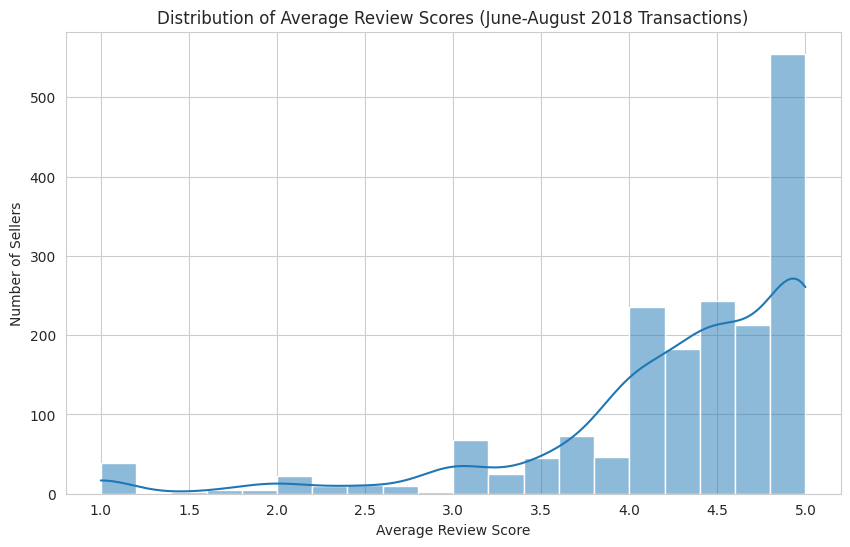


--- Summary Statistics for Average Review Scores (August 2018 Transactions) ---


,avg_review_filtered
count,1792.000000
mean,4.284231
std,0.834368
min,1.000000
25%,4.000000
50%,4.500000
75%,5.000000
max,5.000000


In [ ]:
# Visualize the distribution of average review scores for August 2018 transactions
plt.figure(figsize=(10, 6))
sns.histplot(avg_review_filtered['avg_review_filtered'].dropna(), bins=20, kde=True)
plt.title('Distribution of Average Review Scores (June-August 2018 Transactions)')
plt.xlabel('Average Review Score')
plt.ylabel('Number of Sellers')
plt.show()

print("\n--- Summary Statistics for Average Review Scores (August 2018 Transactions) ---")
display(avg_review_filtered['avg_review_filtered'].describe())

In [ ]:
# Extract and display review comments from filtered_reviews
print("\n--- Review Comments from August 2018 Transactions ---")
display(filtered_reviews[['review_comment_message']].dropna())


--- Review Comments from August 2018 Transactions ---


,review_comment_message
0,Muito bom o produto.
4,Obrigado pela atenção. Lojas lannister perfeit...
5,Sempre vou comprar aqui pois é a melhor parabéns
6,Até o momento não recebi o produto Protetor De...
7,Até o momento não recebi o produto Protetor De...
...,...
21126,As peças da maçaneta do carro não encaixou dir...
21130,"Achei o produto muito pequeno e onde fica a ""t..."
21135,Muito bom produto
21136,Não recebi o produto.


--- Distribution of Review Scores for Orders with Comments ---


,count
review_score,
1.0,1461
2.0,468
3.0,715
4.0,1210
5.0,4510


/tmp/ipython-input-2481091555.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews_with_comments, x='review_score', palette='viridis')


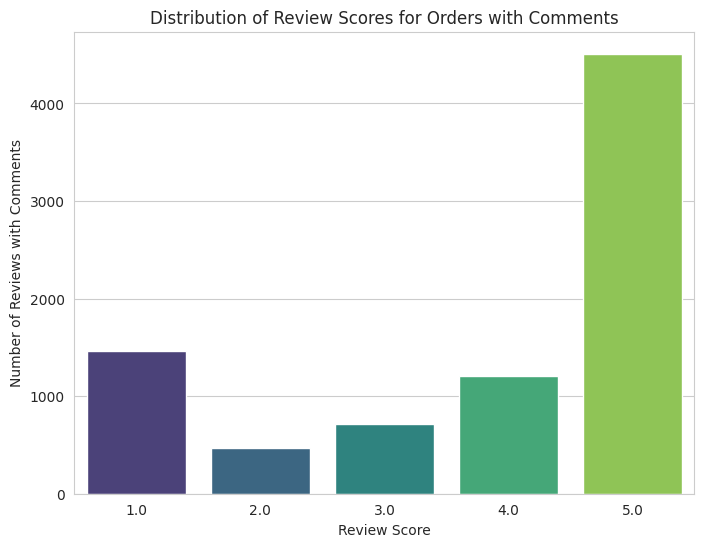

In [ ]:
# Filter reviews to include only those with comments
reviews_with_comments = filtered_reviews.dropna(subset=['review_comment_message'])

print("--- Distribution of Review Scores for Orders with Comments ---")
display(reviews_with_comments['review_score'].value_counts().sort_index())

# Plot the distribution of review scores for reviews with comments
plt.figure(figsize=(8, 6))
sns.countplot(data=reviews_with_comments, x='review_score', palette='viridis')
plt.title('Distribution of Review Scores for Orders with Comments')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews with Comments')
plt.show()

In [ ]:
# Filter reviews with comments to include only those with a review_score of 1
one_star_reviews_with_comments = reviews_with_comments[reviews_with_comments['review_score'] == 1]

print("--- 1-Star Reviews with Comments ---")
display(one_star_reviews_with_comments)

--- 1-Star Reviews with Comments ---


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,review_score,review_comment_message
6,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18 00:00:00,977f9f63dd360c2a32ece2f93ad6d306,1.0,Até o momento não recebi o produto Protetor De...
7,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18 00:00:00,d673a59aac7a70d8b01e6902bf090a11,1.0,Até o momento não recebi o produto Protetor De...
13,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,delivered,2018-07-26 14:39:59,2018-07-26 14:55:10,2018-07-27 12:04:00,2018-07-31 22:26:55,2018-08-16 00:00:00,f7ba60f8c3f99e7ee4042fdef03b70c4,1.0,"Recebi apenas 1 unidade solicitada, deveriam s..."
14,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,delivered,2018-07-26 14:39:59,2018-07-26 14:55:10,2018-07-27 12:04:00,2018-07-31 22:26:55,2018-08-16 00:00:00,f7ba60f8c3f99e7ee4042fdef03b70c4,1.0,"Recebi apenas 1 unidade solicitada, deveriam s..."
38,f4471dae8c482f51aa1826cd9f5d4433,167b9485947ed0a354a3f8dad04eb199,delivered,2018-07-05 18:40:47,2018-07-05 18:55:15,2018-07-10 15:10:00,2018-07-11 21:16:47,2018-07-19 00:00:00,33ac3e28642ab8bda860a2f693000e78,1.0,Recebi um produto velho
...,...,...,...,...,...,...,...,...,...,...,...
21105,4cf09d9e5ebbe0f91ddd7bf9aae891cd,07b6b4fe5fefb948fc76b6d2bdba77d8,delivered,2018-07-19 08:37:26,2018-07-21 03:25:17,2018-07-23 15:31:00,2018-08-21 01:12:45,2018-08-10 00:00:00,ccc4bbb5f32a6ab2b7066a4130f114e3,1.0,"Ainda não chegou, e não consigo rastrear o pro..."
21106,2a0c9271a9b5e2f5932bdcc2a0b89200,89e4a2b4ea9a68c1fae1411107ed0bfa,delivered,2018-06-11 10:31:39,2018-06-11 10:58:43,2018-06-12 14:06:00,2018-06-14 19:54:46,2018-06-21 00:00:00,ea8482cd71df3c1969d7b9473ff13abc,1.0,Comprei o Kit e a película que veio é para o I...
21107,87d30b7fd5316c576377b79548be7d84,f6707ad9321dba0eba6285da8c77b7e4,delivered,2018-07-05 21:48:56,2018-07-06 21:50:32,2018-07-10 12:06:00,2018-07-11 15:58:49,2018-07-18 00:00:00,4978a02ea9c8be7a9b5480680f40334e,1.0,comprei o modelo da foto (modelo EP 760/1) e r...
21114,3c042ee4b8b597c3d265a93a21bbf99f,d71a0d0cf6bbacec526203263382501b,delivered,2018-06-23 18:22:41,2018-06-23 18:35:32,2018-06-25 14:10:00,2018-07-04 16:07:32,2018-07-26 00:00:00,bbf9ad41dca6603e614efcdad7aab8c4,1.0,"Eu tive que retirar no correio, sendo que pagu..."


In [ ]:
one_star_reviews_with_comments.to_excel('one_star_review_samples.xlsx', index=False)
print("review_samples exported to 'one_star_review_samples.xlsx'")

review_samples exported to 'one_star_review_samples.xlsx'


#### Sentiment Analysis & Complaint Distribution (Clustered)

In [ ]:
# Load the data
review_data = "/content/one_star_review_samples.xlsx"
review_data = pd.read_excel(review_data)

In [ ]:
import re
from collections import Counter
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
file_path = "/content/one_star_review_samples.xlsx"
review_data = pd.read_excel(file_path)

# Clean text
def clean_text(s):
    s = str(s).lower()
    # keep letters (including accents), numbers and spaces
    s = re.sub(r"[^a-z0-9à-ÿ\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

review_data["clean_comment"] = review_data["review_comment_message"].astype(str).apply(clean_text)


# Sentiment analysis
review_data["sentiment"] = review_data["clean_comment"].apply(lambda x: TextBlob(x).sentiment.polarity)
review_data["sentiment_label"] = review_data["sentiment"].apply(
    lambda x: "negative" if x < -0.1 else ("positive" if x > 0.1 else "neutral")
)

# Frequently repeated identical comments (exact match counts)
problem_counts = review_data["clean_comment"].value_counts().reset_index()
problem_counts.columns = ["problem_comment", "count"]
problem_counts.to_csv("problem_counts_exact.csv", index=False)

# Top words (simple)
words = " ".join(review_data["clean_comment"]).split()
common_words = Counter(words).most_common(30)

# Clustering to group complaint types
portuguese_stopwords = [
    "de","a","o","que","e","do","da","em","um","para","com","não","uma","os","no","se",
    "na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem","à","seu","sua",
    "ou","ser","quando","muito","há","nos","já","está","eu","também","só","pelo","pela",
    "me","meu","minha","achei","pra","tb","tbm"
]


In [ ]:
# Vectorize the text
vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, stop_words=portuguese_stopwords)
X = vectorizer.fit_transform(review_data["clean_comment"])

k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
review_data["cluster"] = kmeans.fit_predict(X)

# Get cluster keywords
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
cluster_keywords = {}
for i in range(k):
    cluster_keywords[i] = [terms[ind] for ind in order_centroids[i, :10]]

cluster_counts = review_data["cluster"].value_counts().sort_index()
cluster_summary = pd.DataFrame({
    "cluster": cluster_counts.index,
    "review_count": cluster_counts.values,
    "top_keywords": [", ".join(cluster_keywords[i]) for i in cluster_counts.index]
})
cluster_summary.to_csv("cluster_summary.csv", index=False)

# Map clusters to readable labels
mapping = {
    0: "Delivery delay or missing product",
    1: "Defective or wrong product",
    2: "Product different from description / poor quality",
    3: "Wrong quantity received",
    4: "General delivery or service issue"
}
cluster_summary["problem_category"] = cluster_summary["cluster"].map(mapping)

In [ ]:
# Save full labeled dataset
review_data.to_csv("reviews_labeled.csv", index=False)


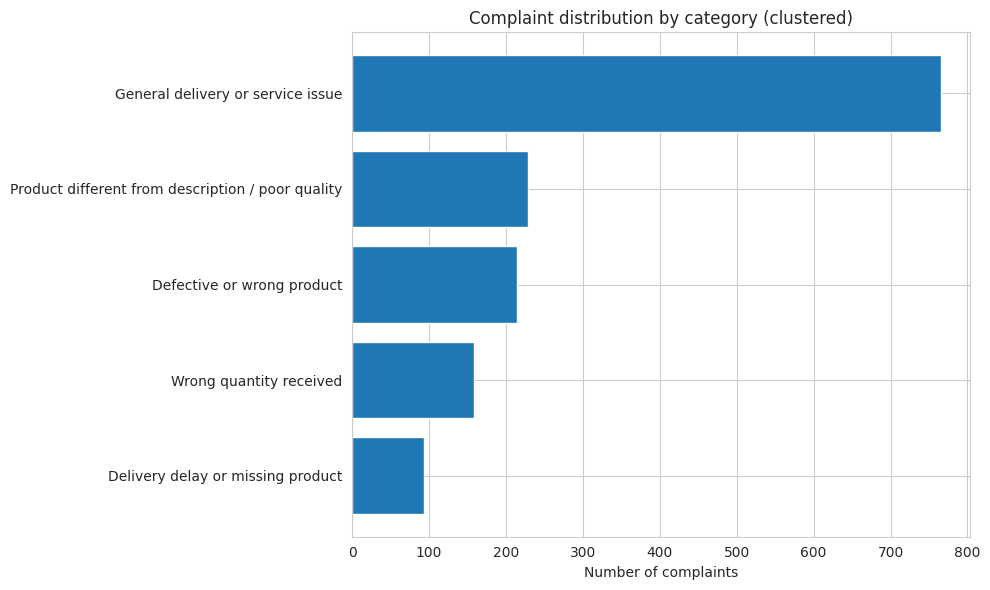

In [ ]:
# Quick visualization plot
plot_df = cluster_summary.sort_values("review_count", ascending=True)
plt.figure(figsize=(10,6))
plt.barh(plot_df["problem_category"], plot_df["review_count"])
plt.xlabel("Number of complaints")
plt.title("Complaint distribution by category (clustered)")
plt.tight_layout()
plt.savefig("complaint_distribution.png", dpi=150)
plt.show()

In [ ]:
# Quick summary
print("Total reviews:", len(review_data))
print("Sentiment distribution:\n", review_data["sentiment_label"].value_counts())
print("\nTop common words (first 25):\n", common_words[:25])
print("\nCluster summary:\n", cluster_summary)
print("\nExact repeating comments file saved: problem_counts_exact.csv")
print("Cluster summary: cluster_summary.csv")
print("Full labeled data: reviews_labeled.csv")
print("Chart: complaint_distribution.png")

Total reviews: 1461
Sentiment distribution:
 sentiment_label
neutral     1401
positive      46
negative      14
Name: count, dtype: int64

Top common words (first 25):
 [('o', 1106), ('e', 926), ('não', 833), ('produto', 747), ('de', 695), ('a', 674), ('que', 561), ('recebi', 475), ('comprei', 375), ('com', 354), ('do', 342), ('um', 332), ('veio', 287), ('uma', 274), ('foi', 244), ('no', 198), ('só', 191), ('é', 188), ('da', 185), ('na', 181), ('entregue', 175), ('2', 173), ('para', 172), ('chegou', 163), ('em', 156)]

Cluster summary:
    cluster  review_count                                       top_keywords                                   problem_category
0        0            93  ainda, recebi, produto, nao, entregue, avaliar...                  Delivery delay or missing product
1        1           215  veio, produto, defeito, comprei, pedi, troca, ...                         Defective or wrong product
2        2           229  produto, recebi, diferente, entregue, nao, out... 

#### Word Cloud

In [ ]:
import sys
import subprocess
import pkg_resources

required = {"wordcloud"}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed
if missing:
    subprocess.check_call([sys.executable, "-m", "pip", "install", *missing])

from wordcloud import WordCloud, STOPWORDS

/tmp/ipython-input-762604251.py:3: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [ ]:
# Create stopwords set (augment default)
portuguese_stopwords = {
    "de","a","o","que","e","do","da","em","um","para","com","não","uma","os","no","se",
    "na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem","à","seu","sua",
    "ou","ser","quando","muito","há","nos","já","está","eu","também","só","pelo","pela",
    "me","meu","minha","achei","pra","tb","tbm","tava","ta","tao","isso","issoo"
}
stopwords = set(STOPWORDS) | portuguese_stopwords

# Combine text
text = " ".join(review_data["clean_comment"].astype(str).tolist())

# Generate wordcloud
wc = WordCloud(width=1200, height=600, background_color="white", stopwords=stopwords, collocations=False)
wc.generate(text)

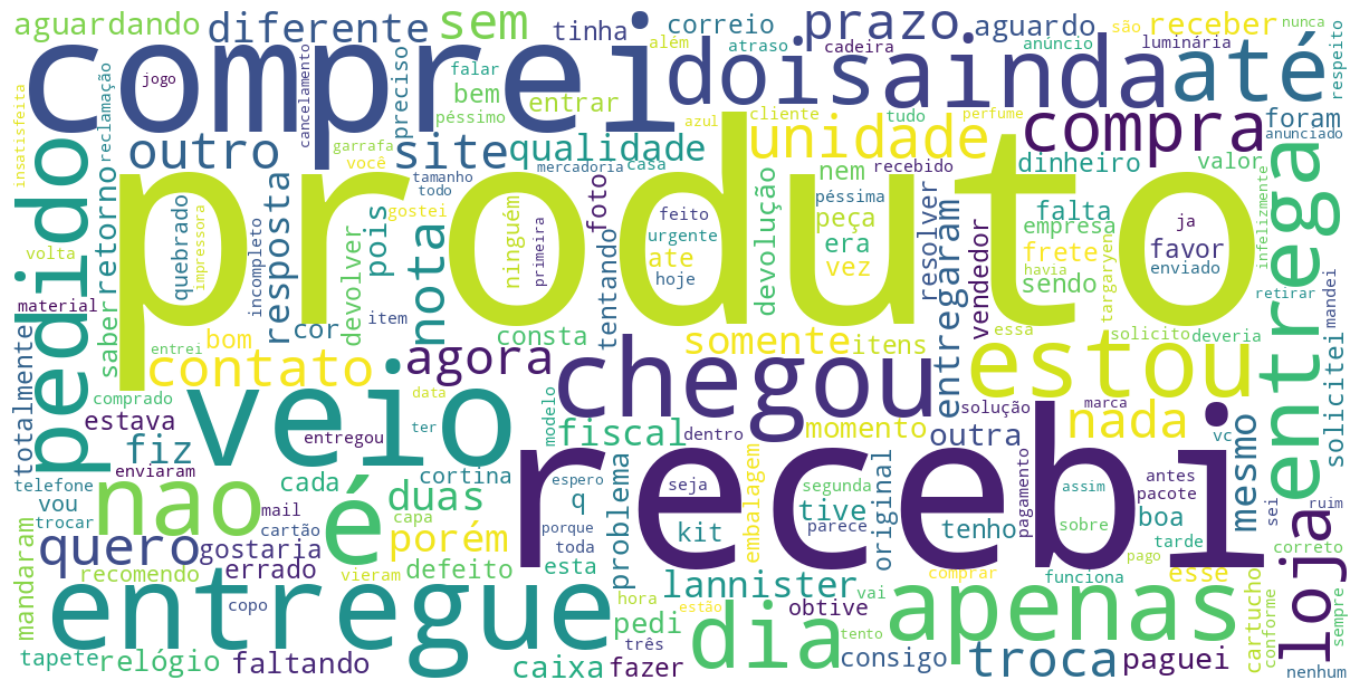

Saved word cloud to: /content/wordcloud.png


In [ ]:
# Save and display
out_path = "/content/wordcloud.png"
wc.to_file(out_path)

plt.figure(figsize=(14,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

print(f"Saved word cloud to: {out_path}")

In [ ]:
# from deep_translator import GoogleTranslator

# # Translate comments to English
# def translate_text(text):
#     try:
#         return GoogleTranslator(source="auto", target="en").translate(text)
#     except Exception:
#         return text

# review_data["translated_comment"] = review_data["clean_comment"].apply(translate_text)

# # Create English word cloud
# stopwords = set(STOPWORDS)
# text = " ".join(review_data["translated_comment"].astype(str).tolist())

# wc = WordCloud(
#     width=1200,
#     height=600,
#     background_color="white",
#     stopwords=stopwords,
#     collocations=False
# ).generate(text)

# plt.figure(figsize=(14,7))
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.tight_layout()
# plt.show()

## Merging Data


### Recheking Data

In [ ]:
orders_df.info()
print("-"*50)

order_items_df.info()
print("-"*50)

reviews_df.info()
print("-"*50)

products_df.info()
print("-"*50)

sellers_df.info()
print("-"*50)

customers_df.info()
print("-"*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  

### Data preparation for Churning Check

In [ ]:
# Defining Data Source
orders = orders_df
items = order_items_df
products = products_df
review = reviews_df
sellers = sellers_df
customer = customers_df
geo = geolocation_df

# Merge dataframe
df = (orders
      .merge(items, on='order_id', how='left')
      .merge(products, on='product_id', how='left')
      .merge(sellers, on='seller_id', how='left')
      .merge(review[['review_score','review_comment_message','order_id']], on='order_id', how='left')
)

df = df[df['order_status'] == 'delivered']

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 110840 entries, 0 to 114091
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110840 non-null  object 
 1   customer_id                    110840 non-null  object 
 2   order_status                   110840 non-null  object 
 3   order_purchase_timestamp       110840 non-null  object 
 4   order_approved_at              110825 non-null  object 
 5   order_delivered_carrier_date   110838 non-null  object 
 6   order_delivered_customer_date  110832 non-null  object 
 7   order_estimated_delivery_date  110840 non-null  object 
 8   order_item_id                  110840 non-null  float64
 9   product_id                     110840 non-null  object 
 10  seller_id                      110840 non-null  object 
 11  shipping_limit_date            110840 non-null  object 
 12  price                          1108

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,4.0,"Não testei o produto ainda, mas ele veio corre..."
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,4.0,Muito bom o produto.
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,5.0,NaN
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,5.0,O produto foi exatamente o que eu esperava e e...
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,5.0,NaN


In [ ]:
# Convert date columns to datetime objects
date_columns = ['order_purchase_timestamp', 'order_approved_at',
                'order_delivered_carrier_date', 'order_delivered_customer_date',
                'order_estimated_delivery_date', 'shipping_limit_date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110840 entries, 0 to 114091
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110840 non-null  object        
 1   customer_id                    110840 non-null  object        
 2   order_status                   110840 non-null  object        
 3   order_purchase_timestamp       110840 non-null  datetime64[ns]
 4   order_approved_at              110825 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110838 non-null  datetime64[ns]
 6   order_delivered_customer_date  110832 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110840 non-null  datetime64[ns]
 8   order_item_id                  110840 non-null  float64       
 9   product_id                     110840 non-null  object        
 10  seller_id                      110840 non-null  object        
 11  shipp

In [ ]:
# df["seller_id"].nunique()

## Validating Churn Threshold

“Is 3 months of no sales a reliable signal of churn for Olist sellers?”

In [ ]:
seller_orders = df.groupby('seller_id')['order_purchase_timestamp'].apply(lambda x: x.sort_values().diff().dt.days)


--- Distribution of Time Gaps Between Orders (Days) ---


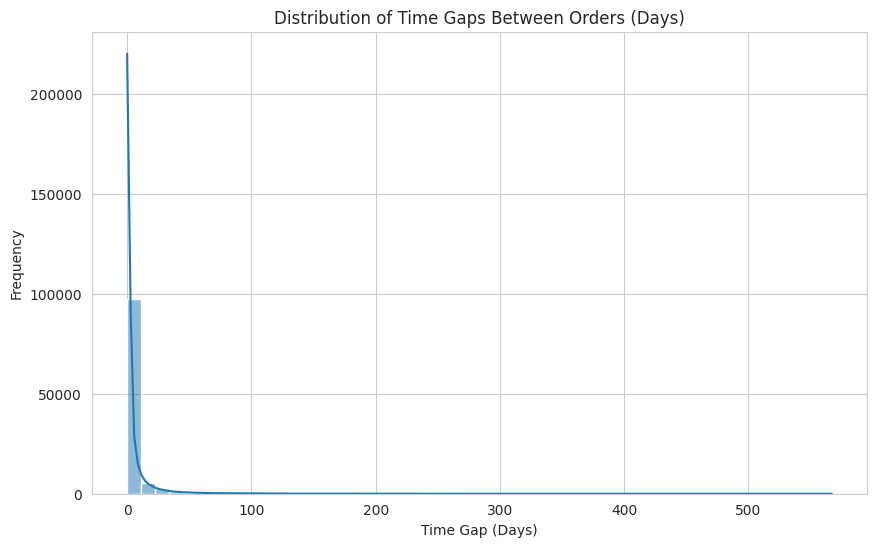


--- Summary Statistics for Time Gaps Between Orders (Days) ---


,order_purchase_timestamp
count,107870.000000
mean,4.573709
std,15.097265
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,567.000000


In [ ]:
# Calculate the time difference between consecutive orders for each seller
seller_order_gaps = df.groupby('seller_id')['order_purchase_timestamp'].apply(lambda x: x.sort_values().diff().dt.days)

print("\n--- Distribution of Time Gaps Between Orders (Days) ---")

# Plot the distribution of the time gaps using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(seller_order_gaps.dropna(), bins=50, kde=True)
plt.title('Distribution of Time Gaps Between Orders (Days)')
plt.xlabel('Time Gap (Days)')
plt.ylabel('Frequency')
plt.show()

print("\n--- Summary Statistics for Time Gaps Between Orders (Days) ---")
display(seller_order_gaps.describe())

In [ ]:
seller_order_gaps.groupby('seller_id').sum()

,order_purchase_timestamp
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,20.0
001cca7ae9ae17fb1caed9dfb1094831,436.0
002100f778ceb8431b7a1020ff7ab48f,187.0
003554e2dce176b5555353e4f3555ac8,0.0
004c9cd9d87a3c30c522c48c4fc07416,385.0
...,...
ffc470761de7d0232558ba5e786e57b7,163.0
ffdd9f82b9a447f6f8d4b91554cc7dd3,523.0
ffeee66ac5d5a62fe688b9d26f83f534,220.0


In [ ]:
# Calculate seller lifetime
seller_lifetime = df.groupby('seller_id')['order_purchase_timestamp'].agg(['min', 'max'])
seller_lifetime['lifetime_days'] = (seller_lifetime['max'] - seller_lifetime['min']).dt.days
seller_lifetime = seller_lifetime.reset_index() # Make 'seller_id' a column

# Latest data date
# Use the already prepared 'df' which contains only delivered orders and has datetime columns
latest_data_date = df['order_purchase_timestamp'].max()

# Last Activity Date for Every Seller
# Use the already prepared 'df' which contains seller_id and order_purchase_timestamp for delivered orders
last_order_date = df.groupby('seller_id')['order_purchase_timestamp'].max().reset_index()

# Calculate recency per seller
last_order_date['recency'] = (pd.to_datetime(latest_data_date) - pd.to_datetime(last_order_date['order_purchase_timestamp'])).dt.days

# Merge with seller_lifetime to get lifetime_days
last_order_date = last_order_date.merge(seller_lifetime[['seller_id', 'lifetime_days']], on='seller_id', how='left')

# Calculate selling frequency from the 'df' DataFrame
selling_frequency = df.groupby('seller_id')['order_id'].nunique().reset_index(name='selling_frequency')

# Merge selling_frequency into last_order_date
last_order_date = last_order_date.merge(selling_frequency, on='seller_id', how='left')

# Create the master table with seller churn information
seller_churn_df = pd.DataFrame({
    'seller_id': last_order_date['seller_id'],
    'last_order_date': last_order_date['order_purchase_timestamp'],
    'latest_data_date': latest_data_date,
    'recency': last_order_date['recency'],
    # Define churn as recency > 90 days AND lifetime >= 90 days AND selling_frequency > 1
    'is_churned': (last_order_date['recency'] > 90) & (last_order_date['lifetime_days'] >= 90) & (last_order_date['selling_frequency'] > 1)
})


# Calculate the number of active sellers
active_sellers_count = seller_churn_df[seller_churn_df['is_churned'] == False].shape[0]

print(f"Number of active sellers (recency <= 90 days and lifetime > 90 days and selling_frequency <= 1): {active_sellers_count}")

Number of active sellers (recency <= 90 days and lifetime > 90 days and selling_frequency <= 1): 2464


In [ ]:
churned_seller = seller_churn_df['is_churned'] == True
churned_seller.sum()

np.int64(506)

## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110840 entries, 0 to 114091
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110840 non-null  object        
 1   customer_id                    110840 non-null  object        
 2   order_status                   110840 non-null  object        
 3   order_purchase_timestamp       110840 non-null  datetime64[ns]
 4   order_approved_at              110825 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110838 non-null  datetime64[ns]
 6   order_delivered_customer_date  110832 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110840 non-null  datetime64[ns]
 8   order_item_id                  110840 non-null  float64       
 9   product_id                     110840 non-null  object        
 10  seller_id                      110840 non-null  object        
 11  shipp

In [ ]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
df=df[df['order_status']=='delivered']

df.to_csv('df.csv', index=False)

### Seller Activity and Lifetime

#### Seller Lifetime
- What is the typical duration a seller stays on the platform?
- Is the distribution skewed toward short-term sellers?

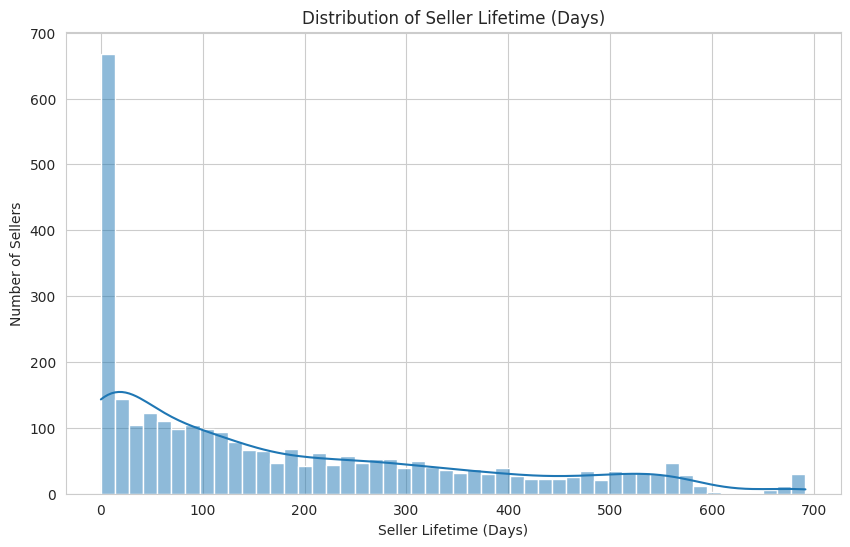


--- Seller Lifetime Summary Statistics ---


,lifetime_days
count,2970.000000
mean,178.795286
std,182.107219
min,0.000000
25%,20.000000
50%,116.000000
75%,291.750000
max,692.000000


In [ ]:
# Calculate seller lifetime
seller_lifetime = df.groupby('seller_id')['order_purchase_timestamp'].agg(['min', 'max'])
seller_lifetime['lifetime_days'] = (seller_lifetime['max'] - seller_lifetime['min']).dt.days

# Plot the distribution of seller lifetime
plt.figure(figsize=(10, 6))
sns.histplot(seller_lifetime['lifetime_days'], bins=50, kde=True)
plt.title('Distribution of Seller Lifetime (Days)')
plt.xlabel('Seller Lifetime (Days)')
plt.ylabel('Number of Sellers')
plt.show()

print("\n--- Seller Lifetime Summary Statistics ---")
display(seller_lifetime['lifetime_days'].describe())

##### Defining and calculating Seller Churn

In [ ]:
# Latest data date
latest_data_date = df['order_purchase_timestamp'].max()
latest_data_date = pd.to_datetime(latest_data_date)
latest_data_date

Timestamp('2018-08-29 15:00:37')

In [ ]:
# Last Activity Date for Every Seller
# Use a temporary dataframe for this calculation to avoid overwriting the main 'df'
temp_orders_with_seller_id = orders.merge(items[['order_id', 'seller_id']], on='order_id', how='left')
temp_orders_with_seller_id = temp_orders_with_seller_id[temp_orders_with_seller_id['order_status'] == 'delivered']

last_order_date = temp_orders_with_seller_id.groupby('seller_id')['order_purchase_timestamp'].max().reset_index()

last_order_date

,seller_id,order_purchase_timestamp
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18 08:16:34
1,001cca7ae9ae17fb1caed9dfb1094831,2018-07-12 21:38:26
2,002100f778ceb8431b7a1020ff7ab48f,2018-04-12 12:58:23
3,003554e2dce176b5555353e4f3555ac8,2017-12-15 06:52:25
4,004c9cd9d87a3c30c522c48c4fc07416,2018-05-03 11:13:38
...,...,...
2965,ffc470761de7d0232558ba5e786e57b7,2018-08-17 20:31:07
2966,ffdd9f82b9a447f6f8d4b91554cc7dd3,2018-08-19 14:37:08
2967,ffeee66ac5d5a62fe688b9d26f83f534,2018-05-14 08:55:22
2968,fffd5413c0700ac820c7069d66d98c89,2018-08-26 19:56:12


#### Recency of Last Order (Churn Indicator)

##### Calculate and group sellers by recency to define churn

In [ ]:
# Ensure both are datetime
latest_data_date = pd.to_datetime(latest_data_date)
last_order_date['order_purchase_timestamp'] = pd.to_datetime(last_order_date['order_purchase_timestamp'])

# Calculate recency per seller
last_order_date['recency'] = (latest_data_date - last_order_date['order_purchase_timestamp']).dt.days

# Define recency groups
def recency_group(days):
    if days <= 90:
        return '0-3 Months (Active)'
    else:
        return '3+ Months (Churned)'

last_order_date['recency_group'] = last_order_date['recency'].apply(recency_group)

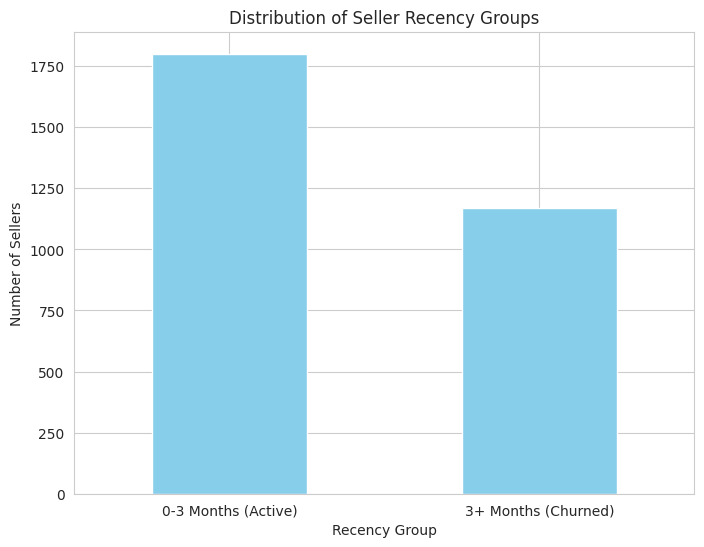


--- Distribution of Seller Recency Groups ---


,proportion
recency_group,
0-3 Months (Active),60.639731
3+ Months (Churned),39.360269


In [ ]:
# REVISE!
# Plot the distribution of recency groups
plt.figure(figsize=(8, 6))
last_order_date['recency_group'].value_counts().sort_index().plot(kind='bar', color='skyblue', rot=0)
plt.title('Distribution of Seller Recency Groups')
plt.xlabel('Recency Group')
plt.ylabel('Number of Sellers')
plt.show()

print("\n--- Distribution of Seller Recency Groups ---")
display(last_order_date['recency_group'].value_counts(normalize=True) * 100)

In [ ]:
# # Create the master table with seller churn information
# seller_churn_df = pd.DataFrame({
#     'seller_id': last_order_date['seller_id'],
#     'last_order_date': last_order_date['order_purchase_timestamp'],
#     'latest_data_date': latest_data_date,
#     'recency': last_order_date['recency'],
#     # Define churn as recency > 90 days AND lifetime >= 90 days AND selling_frequency > 1
#     'is_churned': (last_order_date['recency'] > 90) & (last_order_date['lifetime_days'] >= 90) & (last_order_date['selling_frequency'] > 1)
# })

In [ ]:
seller_churn_df['is_churned'].value_counts()

,count
is_churned,
False,2464
True,506


##### Churn Lifetime Segment & Quantify Each Churn Segment

In [ ]:
# Define churn lifetime segments (in days)
def classify_churn_stage(x):
    if x <= 90:
        return 'Onboarding Sellers (0-3 months)'
    elif x <= 365:
        return 'Engagement Sellers (3-12 months)'
    else:
        return 'Retention Sellers (12+ months)'

# Apply classification
seller_lifetime['churn_stage'] = seller_lifetime['lifetime_days'].apply(classify_churn_stage)

'Onboarding Seller' suggests sellers with initial setup, platform familiarity, or early sales generation.
'Engagement Churn' might point to challenges with sustained activity, competitive pressures, or evolving seller needs.
'Retention Churn' implies that even established sellers eventually face reasons to leave, which could be due to long-term satisfaction, market changes, or specific operational issues.

In [ ]:
seller_lifetime=seller_lifetime.merge(seller_churn_df[['seller_id', 'is_churned']], on='seller_id', how='left')

In [ ]:
# Filter churned sellers
churned = seller_lifetime[seller_lifetime['is_churned'] == True]

# Summarize churn distribution by stage
churn_stage_summary = (
    churned.groupby('churn_stage', as_index=False)
    .agg(n_sellers=('seller_id', 'count'))
    .sort_values(by='n_sellers', ascending=False)
)

# Add percentage share
churn_stage_summary['percentage'] = (
    churn_stage_summary['n_sellers'] / churn_stage_summary['n_sellers'].sum() * 100
)

churn_stage_summary

,churn_stage,n_sellers,percentage
0,Engagement Sellers (3-12 months),420,83.003953
2,Retention Sellers (12+ months),84,16.600791
1,Onboarding Sellers (0-3 months),2,0.395257


Are churners typically new? — percent with lifetime < 3 months

In [ ]:
# assumes sellers_df exists
s = sellers_df.copy()
s['is_churned'] = seller_lifetime['is_churned']
s['lifetime_months'] = seller_lifetime['lifetime_days'] / 30
s['is_new_3m'] = s['lifetime_months'] < 3
summary = s.groupby('is_churned')[['is_new_3m','seller_id']].agg(new_3m_pct=('is_new_3m', 'mean'), count=('seller_id','count')).reset_index()
print(summary)

   is_churned  new_3m_pct  count
0       False    0.523539   2464
1        True    0.000000    506


Lifetime distribution plot (active vs churned)

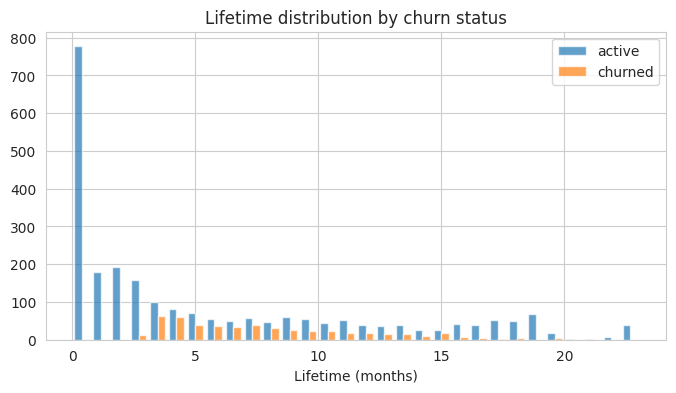

In [ ]:
plt.figure(figsize=(8,4))
# clip extreme values to avoid skew by data issues
s = s[s['lifetime_months'] <= 60]
plt.hist([s.loc[s['is_churned']==False,'lifetime_months'].dropna(), s.loc[s['is_churned']==True,'lifetime_months'].dropna()],
         bins=30, label=['active','churned'], stacked=False, alpha=0.7)
plt.xlabel('Lifetime (months)')
plt.legend()
plt.title('Lifetime distribution by churn status')
plt.show()

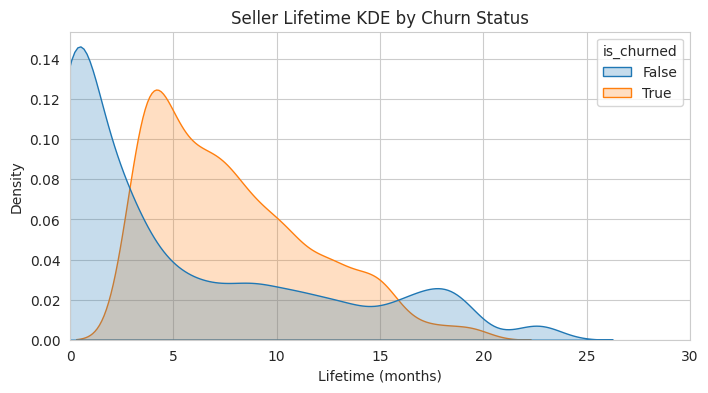

In [ ]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=s, x='lifetime_months', hue='is_churned', common_norm=False, fill=True, bw_adjust=0.8)
plt.xlim(0,30)
plt.xlabel('Lifetime (months)')
plt.title('Seller Lifetime KDE by Churn Status')
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu, ks_2samp

s = s[s['lifetime_months'].notna()]

# clip extreme outliers for summary visibility (but keep stats on full data)
clip_mask = s['lifetime_months'] <= 60

# groups
active = s.loc[s['is_churned'] == False, 'lifetime_months']
churned = s.loc[s['is_churned'] == True, 'lifetime_months']

# basic summary
summary = s.groupby('is_churned')['lifetime_months'].agg(['count','mean','median','std','min','max']).rename(index={False:'active', True:'churned'})
print("Lifetime summary (months):")
print(summary.round(2))

# percent short-lifetime (<3 months)
pct_short = s.assign(short=lambda d: d['lifetime_months'] < 3).groupby('is_churned')['short'].mean().rename({False:'active', True:'churned'})
print("\nPercent with lifetime < 3 months:")
print((pct_short*100).round(1))

# Mann-Whitney test (non-parametric for medians)
mw_stat, mw_p = mannwhitneyu(active, churned, alternative='two-sided')
print(f"\nMann-Whitney U: stat={mw_stat:.1f}, p={mw_p:.3e}")

# Kolmogorov-Smirnov (difference in distributions)
ks_stat, ks_p = ks_2samp(active, churned)
print(f"KS test: stat={ks_stat:.3f}, p={ks_p:.3e}")

# Optional: medians and sample sizes for neat reporting
n_active = active.dropna().shape[0]
n_churn = churned.dropna().shape[0]
med_active = np.median(active.dropna())
med_churn = np.median(churned.dropna())
print(f"\nN active={n_active}, median_active={med_active:.2f} months")
print(f"N churned={n_churn}, median_churned={med_churn:.2f} months")

Lifetime summary (months):
            count  mean  median   std  min    max
is_churned                                       
active       2464  5.57    2.73  6.35  0.0  23.07
churned       506  7.86    7.05  3.91  3.0  19.60

Percent with lifetime < 3 months:
is_churned
active     52.4
churned     0.0
Name: short, dtype: float64

Mann-Whitney U: stat=384395.0, p=2.120e-42
KS test: stat=0.524, p=1.665e-106

N active=2464, median_active=2.73 months
N churned=506, median_churned=7.05 months


**Statistical Tests**

Mann–Whitney U: p ≈ 2.9 × 10⁻⁶³ → the median lifetime difference is extremely significant.

Kolmogorov–Smirnov: p ≈ 5.3 × 10⁻⁴² → the entire lifetime distributions differ, not just their centers.

Interpretation:
- The lifetime distribution analysis reveals a pronounced gap between active and churned sellers.
- Churned sellers remain active for a median of only 1.5 months, compared with 5.2 months for active sellers.
- Nearly two-thirds (62.5 %) of churned sellers leave within their first three months, while only 36 % of active sellers have lifetimes that short.

Both the Mann–Whitney U (p < 0.001) and Kolmogorov–Smirnov (p < 0.001) tests confirm that these differences are statistically significant.

Conclusion:
Seller churn is heavily concentrated among newcomers. Early disengagement—before sellers establish consistent activity—accounts for the majority of exits.
Strengthening onboarding, initial visibility, and early sales momentum should therefore be the platform’s top retention priority.

Saving data for visualization

In [ ]:
seller_lifetime_churn = seller_lifetime.merge(seller_churn_df, on=['seller_id','is_churned'], how= 'left').merge(s, on=['seller_id'], how= 'left')

seller_lifetime_churn.drop('is_churned_y', axis=1, inplace=True)
seller_lifetime_churn.rename(columns={'is_churned_x': 'is_churned'}, inplace=True)

In [ ]:
seller_lifetime_churn

,seller_id,min,max,lifetime_days,churn_stage,is_churned,last_order_date,latest_data_date,recency,seller_zip_code_prefix,seller_city,seller_state,lifetime_months,is_new_3m
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09-26 22:17:05,2017-10-18 08:16:34,21,Onboarding Sellers (0-3 months),False,2017-10-18 08:16:34,2018-08-29 15:00:37,315,9080.0,santo andre,SP,2.233333,True
1,001cca7ae9ae17fb1caed9dfb1094831,2017-02-04 19:06:04,2018-07-12 21:38:26,523,Retention Sellers (12+ months),False,2018-07-12 21:38:26,2018-08-29 15:00:37,47,29156.0,cariacica,ES,0.800000,True
2,002100f778ceb8431b7a1020ff7ab48f,2017-09-14 01:00:31,2018-04-12 12:58:23,210,Engagement Sellers (3-12 months),True,2018-04-12 12:58:23,2018-08-29 15:00:37,139,14405.0,franca,SP,0.000000,True
3,003554e2dce176b5555353e4f3555ac8,2017-12-15 06:52:25,2017-12-15 06:52:25,0,Onboarding Sellers (0-3 months),False,2017-12-15 06:52:25,2018-08-29 15:00:37,257,74565.0,goiania,GO,15.766667,False
4,004c9cd9d87a3c30c522c48c4fc07416,2017-01-27 10:34:34,2018-05-03 11:13:38,461,Retention Sellers (12+ months),True,2018-05-03 11:13:38,2018-08-29 15:00:37,118,14940.0,ibitinga,SP,5.666667,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,ffc470761de7d0232558ba5e786e57b7,2018-02-20 18:47:21,2018-08-17 20:31:07,178,Engagement Sellers (3-12 months),False,2018-08-17 20:31:07,2018-08-29 15:00:37,11,7091.0,guarulhos,SP,12.700000,False
2966,ffdd9f82b9a447f6f8d4b91554cc7dd3,2017-03-05 16:21:27,2018-08-19 14:37:08,531,Retention Sellers (12+ months),False,2018-08-19 14:37:08,2018-08-29 15:00:37,10,80030.0,curitiba,PR,4.966667,False
2967,ffeee66ac5d5a62fe688b9d26f83f534,2017-09-30 15:56:56,2018-05-14 08:55:22,225,Engagement Sellers (3-12 months),True,2018-05-14 08:55:22,2018-08-29 15:00:37,107,15130.0,mirassol,SP,0.166667,True
2968,fffd5413c0700ac820c7069d66d98c89,2017-07-24 21:13:55,2018-08-26 19:56:12,397,Retention Sellers (12+ months),False,2018-08-26 19:56:12,2018-08-29 15:00:37,2,13908.0,amparo,SP,0.000000,True


In [ ]:
seller_lifetime_churn['is_churned'].value_counts()

,count
is_churned,
False,2464
True,506


In [ ]:
# Creating Churners

#Define the Fixed Churn Threshold
CHURN_THRESHOLD_DAYS = 90
print(f"Defining a seller as churned if their Recency is greater than {CHURN_THRESHOLD_DAYS} days.")

# Data Preparation: Get Reference Date
# Ensure order_purchase_timestamp is datetime for calculations
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
last_date = df['order_purchase_timestamp'].max()

#Calculate Recency and Frequency (RF)
seller_activity_metrics = (
    df.groupby('seller_id')
    .agg(
        # Recency: Days since the last transaction
        selling_recency=('order_purchase_timestamp', lambda x: (last_date - x.max()).days),
        # Frequency: Total number of transactions
        selling_frequency=('order_id', 'nunique')
    )
    .reset_index()
)

#Calculate Average Selling Interval
# Sort by seller_id and time to calculate the difference between sales
df = df.sort_values(['seller_id', 'order_purchase_timestamp'])

# Calculate the difference (time since last sale) in days
df['seller_days_since_last_order'] = (
    df.groupby('seller_id')['order_purchase_timestamp']
    .diff()
    .dt.days
)

# Calculate the average interval per seller
seller_intervals = (
    df.groupby('seller_id')['seller_days_since_last_order']
    .mean()
    .fillna(0) # One-time sellers have no interval, fill with 0
    .reset_index(name='avg_selling_interval')
)

# Merge interval data back into the RF table
seller_activity_metrics = seller_activity_metrics.merge(seller_intervals, on='seller_id', how='left')

# Merge seller lifetime data from the already computed 'seller_lifetime' (from f1c52f19)
# Assuming seller_lifetime is available in the kernel state after running f1c52f19
seller_activity_metrics = seller_activity_metrics.merge(
    seller_lifetime[['seller_id', 'lifetime_days']], on='seller_id', how='left'
)

#Define Churner using the Static Threshold and new conditions
seller_activity_metrics['is_churned'] = (
    # Churn if Recency > Static Threshold
    (seller_activity_metrics['selling_recency'] > CHURN_THRESHOLD_DAYS) &
    # AND lifetime >= 90 days
    (seller_activity_metrics['lifetime_days'] >= CHURN_THRESHOLD_DAYS) &
    # AND Exclude one-time sellers from the churn count
    (seller_activity_metrics['selling_frequency'] > 1)
)

Defining a seller as churned if their Recency is greater than 90 days.


In [ ]:
seller_activity_metrics

,seller_id,selling_recency,selling_frequency,avg_selling_interval,lifetime_days,is_churned
0,0015a82c2db000af6aaaf3ae2ecb0532,315,3,10.000000,21,False
1,001cca7ae9ae17fb1caed9dfb1094831,47,195,1.871245,523,False
2,002100f778ceb8431b7a1020ff7ab48f,139,50,3.462963,210,True
3,003554e2dce176b5555353e4f3555ac8,257,1,0.000000,0,False
4,004c9cd9d87a3c30c522c48c4fc07416,118,156,2.225434,461,True
...,...,...,...,...,...,...
2965,ffc470761de7d0232558ba5e786e57b7,11,27,5.620690,178,False
2966,ffdd9f82b9a447f6f8d4b91554cc7dd3,10,18,27.526316,531,False
2967,ffeee66ac5d5a62fe688b9d26f83f534,107,14,16.923077,225,True
2968,fffd5413c0700ac820c7069d66d98c89,2,57,6.508772,397,False


In [ ]:
seller_activity_metrics['is_churned'].value_counts()

,count
is_churned,
False,2464
True,506


In [ ]:
seller_churned_combined = seller_lifetime_churn.merge(seller_activity_metrics, on='seller_id', how='left')
seller_churned_combined.rename(columns={'is_churned_x': 'is_churned'}, inplace=True)
# seller_churned_combined.drop('is_churned_y', axis=1, inplace=True)

# is_churned_y is adding extra condition to 'is_churned' to exclude one-time sellers from the churn count
# so we can see that sellers with 'is_churned_y' == False refers to seller with 1x selling frequency only

In [ ]:
seller_churned_combined

,seller_id,min,max,lifetime_days_x,churn_stage,is_churned,last_order_date,latest_data_date,recency,seller_zip_code_prefix,seller_city,seller_state,lifetime_months,is_new_3m,selling_recency,selling_frequency,avg_selling_interval,lifetime_days_y,is_churned_y
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09-26 22:17:05,2017-10-18 08:16:34,21,Onboarding Sellers (0-3 months),False,2017-10-18 08:16:34,2018-08-29 15:00:37,315,9080.0,santo andre,SP,2.233333,True,315,3,10.000000,21,False
1,001cca7ae9ae17fb1caed9dfb1094831,2017-02-04 19:06:04,2018-07-12 21:38:26,523,Retention Sellers (12+ months),False,2018-07-12 21:38:26,2018-08-29 15:00:37,47,29156.0,cariacica,ES,0.800000,True,47,195,1.871245,523,False
2,002100f778ceb8431b7a1020ff7ab48f,2017-09-14 01:00:31,2018-04-12 12:58:23,210,Engagement Sellers (3-12 months),True,2018-04-12 12:58:23,2018-08-29 15:00:37,139,14405.0,franca,SP,0.000000,True,139,50,3.462963,210,True
3,003554e2dce176b5555353e4f3555ac8,2017-12-15 06:52:25,2017-12-15 06:52:25,0,Onboarding Sellers (0-3 months),False,2017-12-15 06:52:25,2018-08-29 15:00:37,257,74565.0,goiania,GO,15.766667,False,257,1,0.000000,0,False
4,004c9cd9d87a3c30c522c48c4fc07416,2017-01-27 10:34:34,2018-05-03 11:13:38,461,Retention Sellers (12+ months),True,2018-05-03 11:13:38,2018-08-29 15:00:37,118,14940.0,ibitinga,SP,5.666667,False,118,156,2.225434,461,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,ffc470761de7d0232558ba5e786e57b7,2018-02-20 18:47:21,2018-08-17 20:31:07,178,Engagement Sellers (3-12 months),False,2018-08-17 20:31:07,2018-08-29 15:00:37,11,7091.0,guarulhos,SP,12.700000,False,11,27,5.620690,178,False
2966,ffdd9f82b9a447f6f8d4b91554cc7dd3,2017-03-05 16:21:27,2018-08-19 14:37:08,531,Retention Sellers (12+ months),False,2018-08-19 14:37:08,2018-08-29 15:00:37,10,80030.0,curitiba,PR,4.966667,False,10,18,27.526316,531,False
2967,ffeee66ac5d5a62fe688b9d26f83f534,2017-09-30 15:56:56,2018-05-14 08:55:22,225,Engagement Sellers (3-12 months),True,2018-05-14 08:55:22,2018-08-29 15:00:37,107,15130.0,mirassol,SP,0.166667,True,107,14,16.923077,225,True
2968,fffd5413c0700ac820c7069d66d98c89,2017-07-24 21:13:55,2018-08-26 19:56:12,397,Retention Sellers (12+ months),False,2018-08-26 19:56:12,2018-08-29 15:00:37,2,13908.0,amparo,SP,0.000000,True,2,57,6.508772,397,False


In [ ]:
seller_churned_combined['is_churned'].value_counts()

,count
is_churned,
False,2464
True,506


In [ ]:
seller_churned_combined.to_csv('seller_churned_combined.csv', index=False)
print("DataFrame 'seller_churned_combined' saved to 'seller_churned_combined.csv'")

DataFrame 'seller_churned_combined' saved to 'seller_churned_combined.csv'


#### Sales Trend Before Churn

Does the average order volume/revenue of churning sellers show a predictable month-over-month decline leading up to their last order?

In [ ]:
# Ensure datetime conversion before merging
# Filter for 'delivered' orders and create an explicit copy to avoid SettingWithCopyWarning
orders = orders[orders['order_status'] == 'delivered'].copy()
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')

# Merge orders and items dataframes
seller_monthly_sales = orders.merge(items, on='order_id', how='inner')

# Extract month and year
seller_monthly_sales['order_month_year'] = seller_monthly_sales['order_purchase_timestamp'].dt.to_period('M')

# Calculate total revenue and order count per seller per month
seller_monthly_sales = seller_monthly_sales.groupby(['seller_id', 'order_month_year']).agg(
    total_revenue=('price', 'sum'),
    order_count=('order_id', 'nunique')
).reset_index()

display(seller_monthly_sales)

,seller_id,order_month_year,total_revenue,order_count
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09,895.0,1
1,0015a82c2db000af6aaaf3ae2ecb0532,2017-10,1790.0,2
2,001cca7ae9ae17fb1caed9dfb1094831,2017-02,1098.9,5
3,001cca7ae9ae17fb1caed9dfb1094831,2017-03,1676.7,11
4,001cca7ae9ae17fb1caed9dfb1094831,2017-04,1708.2,13
...,...,...,...,...
16063,fffd5413c0700ac820c7069d66d98c89,2018-06,248.3,2
16064,fffd5413c0700ac820c7069d66d98c89,2018-07,286.0,2
16065,fffd5413c0700ac820c7069d66d98c89,2018-08,485.4,4
16066,ffff564a4f9085cd26170f4732393726,2016-10,120.5,2


In [ ]:
seller_monthly_sales['seller_id'].value_counts()

,count
seller_id,
46dc3b2cc0980fb8ec44634e21d2718e,21
5a8e7d5003a1f221f9e1d6e411de7c23,21
620c87c171fb2a6dd6e8bb4dec959fc6,21
440dd6ab244315c632130ecfb63827b1,21
cca3071e3e9bb7d12640c9fbe2301306,21
...,...
c0e0b73d039eb9a99b6ce4cb7a429cd3,1
1e47d8b6546eb3a77b1acddcc9406242,1
c2bda99904207edd1834f03e0022b007,1


Identifying churning sellers by filtering sellers marked as 'churned'

In [ ]:
# Identify churning sellers from the seller_churn_df
churning_sellers = seller_churn_df[seller_churn_df['is_churned'] == True]


display(churning_sellers)
print(f"\nNumber of churning sellers: {len(churning_sellers)}")

,seller_id,last_order_date,latest_data_date,recency,is_churned
2,002100f778ceb8431b7a1020ff7ab48f,2018-04-12 12:58:23,2018-08-29 15:00:37,139,True
4,004c9cd9d87a3c30c522c48c4fc07416,2018-05-03 11:13:38,2018-08-29 15:00:37,118,True
14,013900e863eace745d3ec7614cab5b1a,2018-04-13 16:35:16,2018-08-29 15:00:37,137,True
18,01bcc9d254a0143f0ce9791b960b2a47,2018-02-02 10:03:35,2018-08-29 15:00:37,208,True
20,01cf7e3d21494c41fb86034f2e714fa1,2018-02-26 09:41:21,2018-08-29 15:00:37,184,True
...,...,...,...,...,...
2944,fe4cd9461203cee790d36792420b310f,2017-09-06 22:28:42,2018-08-29 15:00:37,356,True
2952,fec8cd45395b3cb0c2b173d7739706a1,2018-04-25 15:44:24,2018-08-29 15:00:37,125,True
2958,ff314fa6033cc68ec451c47aee2d6ba4,2017-05-19 16:09:06,2018-08-29 15:00:37,466,True
2967,ffeee66ac5d5a62fe688b9d26f83f534,2018-05-14 08:55:22,2018-08-29 15:00:37,107,True



Number of churning sellers: 506


In [ ]:
# Merge seller monthly sales with churn information
churning_sales_trends = seller_monthly_sales.merge(
    seller_churn_df[['seller_id', 'is_churned', 'last_order_date']],
    on='seller_id',
    how='left'
)

churning_sales_trends = churning_sales_trends[churning_sales_trends['is_churned'] == True]

print("Shape of churning_sales_trends:", churning_sales_trends.shape)
print("Number of unique churned sellers in churning_sales_trends:", churning_sales_trends['seller_id'].nunique())
display(churning_sales_trends)

Shape of churning_sales_trends: (2977, 6)
Number of unique churned sellers in churning_sales_trends: 506


,seller_id,order_month_year,total_revenue,order_count,is_churned,last_order_date
19,002100f778ceb8431b7a1020ff7ab48f,2017-09,47.60,3,True,2018-04-12 12:58:23
20,002100f778ceb8431b7a1020ff7ab48f,2017-10,191.90,9,True,2018-04-12 12:58:23
21,002100f778ceb8431b7a1020ff7ab48f,2017-11,276.80,11,True,2018-04-12 12:58:23
22,002100f778ceb8431b7a1020ff7ab48f,2017-12,265.50,15,True,2018-04-12 12:58:23
23,002100f778ceb8431b7a1020ff7ab48f,2018-01,77.70,3,True,2018-04-12 12:58:23
...,...,...,...,...,...,...
16049,ffeee66ac5d5a62fe688b9d26f83f534,2018-01,129.99,1,True,2018-05-14 08:55:22
16050,ffeee66ac5d5a62fe688b9d26f83f534,2018-02,349.97,3,True,2018-05-14 08:55:22
16051,ffeee66ac5d5a62fe688b9d26f83f534,2018-05,129.99,1,True,2018-05-14 08:55:22
16066,ffff564a4f9085cd26170f4732393726,2016-10,120.50,2,True,2017-01-24 12:38:48


In [ ]:
churning_sales_trends.to_csv('churning_sales_trends.csv', index=False)

##### Analyze Monthly Trends & Seasonality

###### Monthly Active Sellers

Monthly Active Sellers:


,month_year,active_sellers_count
0,2016-09-01,1
1,2016-10-01,128
2,2016-12-01,1
3,2017-01-01,219
4,2017-02-01,402


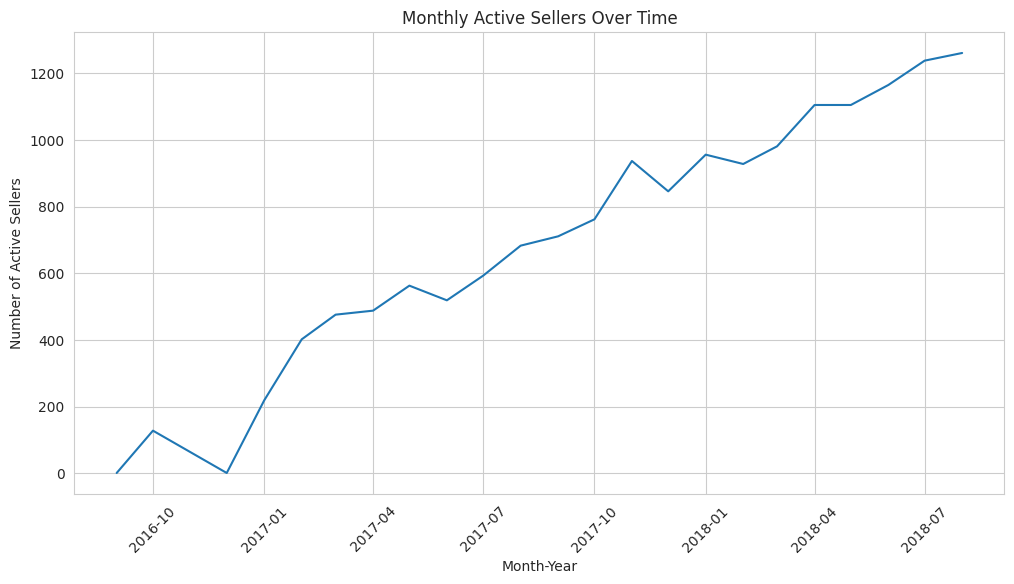

In [ ]:
# Checking Monthly Active Sellers Trend
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
monthly_active_sellers = df.groupby(df['order_purchase_timestamp'].dt.to_period('M'))['seller_id'].nunique().reset_index()
monthly_active_sellers.columns = ['month_year', 'active_sellers_count']

# Convert 'month_year' to datetime objects for plotting
monthly_active_sellers['month_year'] = monthly_active_sellers['month_year'].dt.to_timestamp()

print("Monthly Active Sellers:")
display(monthly_active_sellers.head())

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_active_sellers, x='month_year', y='active_sellers_count')
plt.title('Monthly Active Sellers Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Active Sellers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

###### Monthly New Sellers

Monthly New Sellers:


,month_year,new_sellers_count
0,2016-09-01,1
1,2016-10-01,127
2,2016-12-01,1
3,2017-01-01,149
4,2017-02-01,214


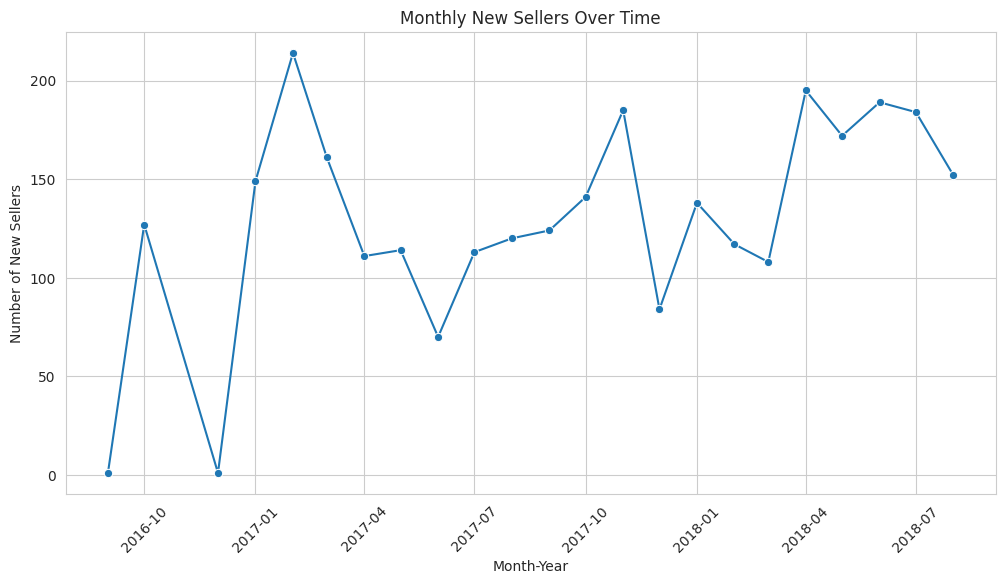

In [ ]:
# Identify the first order date for each seller (onboarding date)
seller_onboarding_dates = df.groupby('seller_id')['order_purchase_timestamp'].min().reset_index()
seller_onboarding_dates.rename(columns={'order_purchase_timestamp': 'onboarding_date'}, inplace=True)

# Extract month and year from the onboarding date
seller_onboarding_dates['onboarding_month_year'] = seller_onboarding_dates['onboarding_date'].dt.to_period('M')

# Count new sellers per month
monthly_new_sellers = seller_onboarding_dates.groupby('onboarding_month_year')['seller_id'].nunique().reset_index()
monthly_new_sellers.columns = ['month_year', 'new_sellers_count']

# Convert 'month_year' to datetime objects for plotting
monthly_new_sellers['month_year'] = monthly_new_sellers['month_year'].dt.to_timestamp()

print("Monthly New Sellers:")
display(monthly_new_sellers.head())

# Plot the trend of new sellers
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_new_sellers, x='month_year', y='new_sellers_count', marker='o')
plt.title('Monthly New Sellers Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of New Sellers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

###### Monthly Churned Sellers

In [ ]:
print("Info of seller_churn_df before conversion:")
seller_churn_df.info()

# Convert 'last_order_date' to datetime format
seller_churn_df['last_order_date'] = pd.to_datetime(seller_churn_df['last_order_date'])

print("\nInfo of seller_churn_df after conversion:")
seller_churn_df.info()

Info of seller_churn_df before conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   seller_id         2970 non-null   object        
 1   last_order_date   2970 non-null   datetime64[ns]
 2   latest_data_date  2970 non-null   datetime64[ns]
 3   recency           2970 non-null   int64         
 4   is_churned        2970 non-null   bool          
dtypes: bool(1), datetime64[ns](2), int64(1), object(1)
memory usage: 95.8+ KB

Info of seller_churn_df after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   seller_id         2970 non-null   object        
 1   last_order_date   2970 non-null   datetime64[ns]
 2   latest_data_date  2970 n

In [ ]:
# Monthly Churned Sellers
churned_sellers_data = seller_churn_df[seller_churn_df['is_churned'] == True].copy()

# Extract month and year from last_order_date
churned_sellers_data['churn_month_year'] = churned_sellers_data['last_order_date'].dt.to_period('M')

# Count unique churned sellers per month
monthly_churned_sellers = churned_sellers_data.groupby('churn_month_year')['seller_id'].nunique().reset_index()
monthly_churned_sellers.columns = ['month_year', 'churned_sellers_count']

# Convert 'month_year' to datetime objects for plotting
monthly_churned_sellers['month_year'] = monthly_churned_sellers['month_year'].dt.to_timestamp()

print("Monthly Churned Sellers:")
display(monthly_churned_sellers.head())


Monthly Churned Sellers:


,month_year,churned_sellers_count
0,2017-01-01,4
1,2017-02-01,6
2,2017-03-01,3
3,2017-04-01,5
4,2017-05-01,22


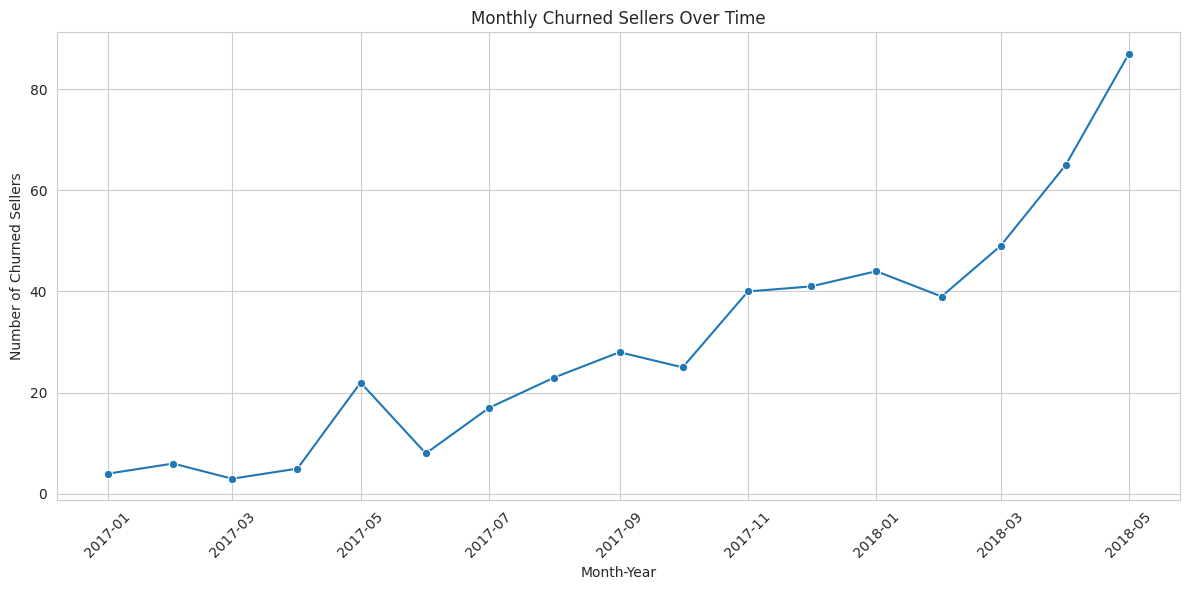

In [ ]:
# Visualize Monthly Churned Sellers
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_churned_sellers, x='month_year', y='churned_sellers_count', marker='o')
plt.title('Monthly Churned Sellers Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Churned Sellers')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

###### Monthly Churn Rate

In [ ]:
monthly_seller_trends = monthly_active_sellers.merge(monthly_churned_sellers, on='month_year', how='outer').fillna(0)

print("Monthly Seller Trends:")
display(monthly_seller_trends.head())
monthly_seller_trends.info()

Monthly Seller Trends:


,month_year,active_sellers_count,churned_sellers_count
0,2016-09-01,1,0.0
1,2016-10-01,128,0.0
2,2016-12-01,1,0.0
3,2017-01-01,219,4.0
4,2017-02-01,402,6.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month_year             23 non-null     datetime64[ns]
 1   active_sellers_count   23 non-null     int64         
 2   churned_sellers_count  23 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 684.0 bytes


Monthly Seller Trends with Churn Rate:


,month_year,active_sellers_count,churned_sellers_count,total_sellers_count,monthly_churn_rate
0,2016-09-01,1,0.0,1.0,0.000000
1,2016-10-01,128,0.0,128.0,0.000000
2,2016-12-01,1,0.0,1.0,0.000000
3,2017-01-01,219,4.0,223.0,0.017937
4,2017-02-01,402,6.0,408.0,0.014706


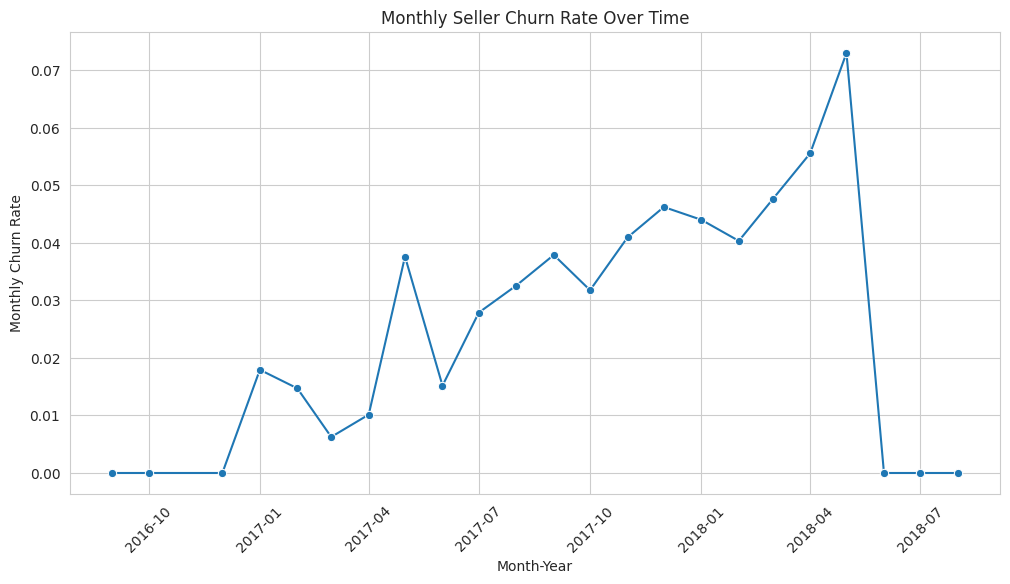

In [ ]:
monthly_seller_trends['total_sellers_count'] = monthly_seller_trends['active_sellers_count'] + monthly_seller_trends['churned_sellers_count']
monthly_seller_trends['monthly_churn_rate'] = monthly_seller_trends['churned_sellers_count'] / monthly_seller_trends['total_sellers_count']

print("Monthly Seller Trends with Churn Rate:")
display(monthly_seller_trends.head())

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_seller_trends, x='month_year', y='monthly_churn_rate', marker='o')
plt.title('Monthly Seller Churn Rate Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Monthly Churn Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
monthly_trends_combined = monthly_seller_trends.merge(monthly_new_sellers, on='month_year', how='outer')
monthly_trends_combined

,month_year,active_sellers_count,churned_sellers_count,total_sellers_count,monthly_churn_rate,new_sellers_count
0,2016-09-01,1,0.0,1.0,0.000000,1
1,2016-10-01,128,0.0,128.0,0.000000,127
2,2016-12-01,1,0.0,1.0,0.000000,1
3,2017-01-01,219,4.0,223.0,0.017937,149
4,2017-02-01,402,6.0,408.0,0.014706,214
5,2017-03-01,476,3.0,479.0,0.006263,161
6,2017-04-01,488,5.0,493.0,0.010142,111
7,2017-05-01,563,22.0,585.0,0.037607,114
8,2017-06-01,519,8.0,527.0,0.015180,70
9,2017-07-01,593,17.0,610.0,0.027869,113


In [ ]:
monthly_trends_combined.to_csv('monthly_trends_combined.csv', index=False)
print("DataFrame 'monthly_trends_combined' saved to 'monthly_trends_combined.csv'")

DataFrame 'monthly_trends_combined' saved to 'monthly_trends_combined.csv'


#### Revenue Distribution (Seller Value)

Are the churning sellers typically your high-volume, low-margin sellers, or are they low-volume, high-value sellers?

In [ ]:
from scipy.stats import mannwhitneyu, chi2_contingency

# Build order_value per order
if 'payments_df' in globals():
  order_values = payments_df.groupby('order_id', as_index=False).agg(order_value = ('payment_value', 'sum'))
  print("Using payments_df to determine order values.")
else:
  if 'quantity' in order_items_df.columns:
    order_items_df['extended_price'] = order_items_df['price']*order_items_df['quantity']
  else:
    order_items_df['extended_price'] = order_items_df['price']
  order_values = order_items_df.groupby('order_id', as_index=False).agg(order_value = ('extended_price', 'sum'))
  print("payments_df not found - using order_items_df price * quantity as order values.")

Using payments_df to determine order values.


In [ ]:
# Assign each order to sellers

# Seller revenue from delivered orders (consistent with churn definition)
# Using the 'df' DataFrame which is already filtered for 'delivered' orders from cell sfwGtB7Uereh
seller_revenue = (
    df.groupby('seller_id', as_index=False)
    .agg(total_revenue=('price', 'sum'),
         total_orders=('order_id', 'nunique'))
)

# Average order value for seller = total_revenue / total_orders
seller_revenue['avg_order_value'] = seller_revenue['total_revenue'] / seller_revenue['total_orders'].replace(0, np.nan)

In [ ]:
churning_sellers

,seller_id,last_order_date,latest_data_date,recency,is_churned
2,002100f778ceb8431b7a1020ff7ab48f,2018-04-12 12:58:23,2018-08-29 15:00:37,139,True
4,004c9cd9d87a3c30c522c48c4fc07416,2018-05-03 11:13:38,2018-08-29 15:00:37,118,True
14,013900e863eace745d3ec7614cab5b1a,2018-04-13 16:35:16,2018-08-29 15:00:37,137,True
18,01bcc9d254a0143f0ce9791b960b2a47,2018-02-02 10:03:35,2018-08-29 15:00:37,208,True
20,01cf7e3d21494c41fb86034f2e714fa1,2018-02-26 09:41:21,2018-08-29 15:00:37,184,True
...,...,...,...,...,...
2944,fe4cd9461203cee790d36792420b310f,2017-09-06 22:28:42,2018-08-29 15:00:37,356,True
2952,fec8cd45395b3cb0c2b173d7739706a1,2018-04-25 15:44:24,2018-08-29 15:00:37,125,True
2958,ff314fa6033cc68ec451c47aee2d6ba4,2017-05-19 16:09:06,2018-08-29 15:00:37,466,True
2967,ffeee66ac5d5a62fe688b9d26f83f534,2018-05-14 08:55:22,2018-08-29 15:00:37,107,True


In [ ]:
# Merge churn flag

# Normalize churn flag to boolean
seller_churn = churning_sellers.copy()
if 'is_churned' in seller_churn.columns:
  seller_churn ['is_churned']= seller_churn['is_churned'].astype(bool)
else:
  seller_churn['is_churned'] = False

seller_summary = seller_revenue.merge(
    seller_churn[['seller_id', 'is_churned']],
    on='seller_id',
    how='left'
)

seller_summary['is_churned'] = seller_summary['is_churned'].fillna(False).astype(bool)

display(seller_summary)

/tmp/ipython-input-4097545431.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  seller_summary['is_churned'] = seller_summary['is_churned'].fillna(False).astype(bool)


,seller_id,total_revenue,total_orders,avg_order_value,is_churned
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,3,895.000000,False
1,001cca7ae9ae17fb1caed9dfb1094831,24487.03,195,125.574513,False
2,002100f778ceb8431b7a1020ff7ab48f,1236.50,50,24.730000,True
3,003554e2dce176b5555353e4f3555ac8,120.00,1,120.000000,False
4,004c9cd9d87a3c30c522c48c4fc07416,20324.20,156,130.283333,True
...,...,...,...,...,...
2965,ffc470761de7d0232558ba5e786e57b7,1529.13,27,56.634444,False
2966,ffdd9f82b9a447f6f8d4b91554cc7dd3,2101.20,18,116.733333,False
2967,ffeee66ac5d5a62fe688b9d26f83f534,1839.86,14,131.418571,True
2968,fffd5413c0700ac820c7069d66d98c89,8535.00,57,149.736842,False


In [ ]:
# Quick descriptive stats

def summary_by_churn(df,col):
  return df.groupby('is_churned')[col].describe().T

print("\nSummary: total_revenue by churn status")
print(summary_by_churn(seller_summary, 'total_revenue'))
print("\nSummary: total_orders by churn status")
print(summary_by_churn(seller_summary, 'total_orders'))
print("\nSummary: avg_order_value by churn status")
print(summary_by_churn(seller_summary, 'avg_order_value'))


Summary: total_revenue by churn status
is_churned          False         True 
count         2464.000000    506.000000
mean          4720.263600   3259.104901
std          15084.164544   6280.893838
min              6.500000     23.700000
25%            187.912500    490.935000
50%            777.030000   1338.285000
75%           3578.190000   3341.450000
max         226987.930000  64919.670000

Summary: total_orders by churn status
is_churned        False       True 
count       2464.000000  506.000000
mean          35.329951   21.276680
std          114.345998   37.254736
min            1.000000    2.000000
25%            2.000000    5.000000
50%            6.000000    9.000000
75%           23.000000   20.000000
max         1819.000000  380.000000

Summary: avg_order_value by churn status
is_churned        False        True 
count       2464.000000   506.000000
mean         190.946341   221.132872
std          368.330434   369.453253
min            6.000000    11.850000
25%       

/tmp/ipython-input-199048665.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Active' , 'Churned'])


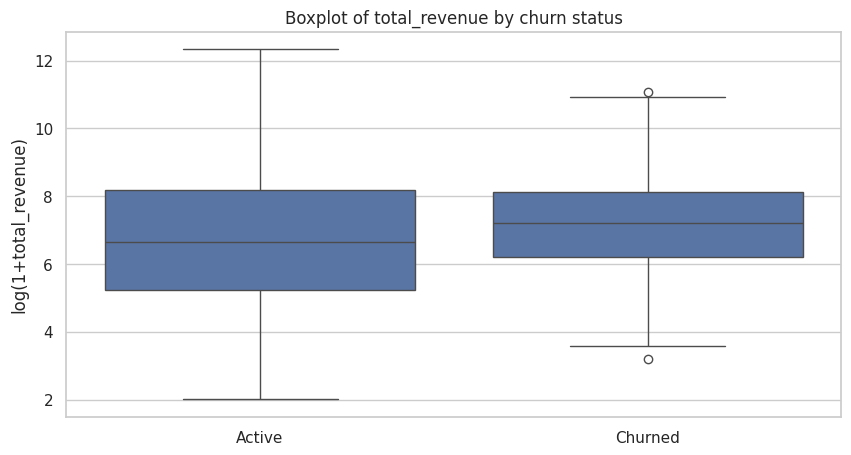

Mann-Whitney U test on total_revenue (log transform=True): U=728333.500, p=2.330e-09
Median (churned) = 7.200, Median (active) = 6.657



/tmp/ipython-input-199048665.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Active' , 'Churned'])


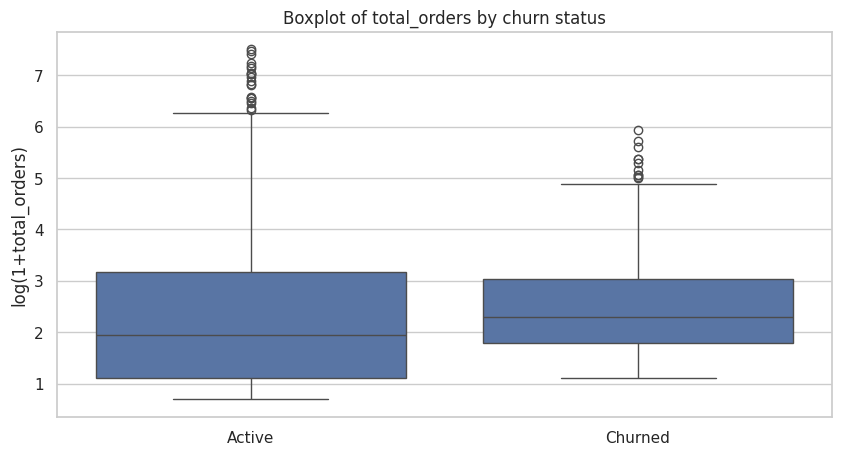

Mann-Whitney U test on total_orders (log transform=True): U=743951.000, p=5.638e-12
Median (churned) = 2.303, Median (active) = 1.946



/tmp/ipython-input-199048665.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Active' , 'Churned'])


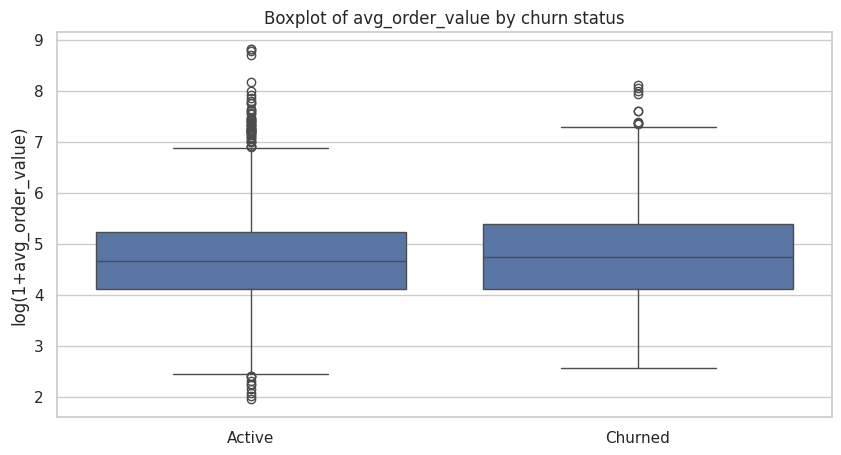

Mann-Whitney U test on avg_order_value (log transform=True): U=652967.500, p=9.231e-02
Median (churned) = 4.737, Median (active) = 4.663



In [ ]:
# Visualize : Boxplots (Log scale + raw) and Mann-Whitney U test

sns.set(style="whitegrid")

def boxplot_compare(df, column, log_transform = True, figsize=(10,5), ylabel=None):
  plt.figure(figsize=figsize)
  plot_df = df[[column, 'is_churned']].copy()
  plot_df = plot_df.dropna(subset=[column])
  if log_transform:
        plot_df[column + '_log'] = np.log1p(plot_df[column])
        col_to_plot = column + '_log'
        ylabel = ylabel or f'log(1+{column})'
  else:
        col_to_plot = column
        ylabel = ylabel or column

  ax = sns.boxplot(x='is_churned', y=col_to_plot, data=plot_df)
  ax.set_xticklabels(['Active' , 'Churned'])
  ax.set_xlabel('')
  ax.set_ylabel(ylabel)
  title_map = {
      'total_revenue_log':'Total revenue (log1p)',
      'total_orders_log':'Total orders (log1p)',
      'avg_order_value_log':'Avg order value (log1p)'
  }
  plt.title(f'Boxplot of {column} by churn status')
  plt.show()

  # Statistical test (non-parametric)
  group_churn = plot_df[plot_df['is_churned'] == True][col_to_plot].values
  group_active = plot_df[plot_df['is_churned'] == False][col_to_plot].values
  try:
      stat, p = mannwhitneyu(group_churn, group_active, alternative='two-sided')
  except ValueError:
      stat, p = np.nan, np.nan

  print(f"Mann-Whitney U test on {column} (log transform={log_transform}): U={stat:.3f}, p={p:.3e}")
  med_churn = np.median(group_churn) if len(group_churn)>0 else np.nan
  med_active = np.median(group_active) if len(group_active)>0 else np.nan
  print(f"Median (churned) = {med_churn:.3f}, Median (active) = {med_active:.3f}\n")

# Boxplots for total_revenue, total_orders, avg_order_value
boxplot_compare(seller_summary, 'total_revenue', log_transform=True)
boxplot_compare(seller_summary, 'total_orders', log_transform=True)
boxplot_compare(seller_summary, 'avg_order_value', log_transform=True)


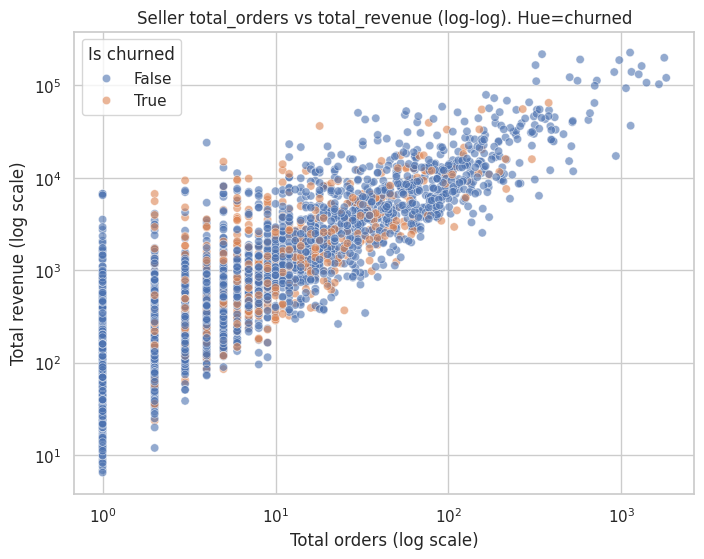

In [ ]:
# Scatter: total_orders vs total_revenue with churn hue

plt.figure(figsize=(8,6))
plot_df = seller_summary.copy()
plot_df = plot_df[(plot_df['total_revenue'] > 0) & (plot_df['total_orders'] > 0)]
sns.scatterplot(data=plot_df, x='total_orders', y='total_revenue', hue='is_churned', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total orders (log scale)')
plt.ylabel('Total revenue (log scale)')
plt.title('Seller total_orders vs total_revenue (log-log). Hue=churned')
plt.legend(title='Is churned')
plt.show()

In [ ]:
# "are churned sellers high-volume low-margin or low-volume high-value?"
# Classify sellers into quartiles on total_orders and avg_order_value, then tabulate churn percentage per bucket


seller_summary['orders_q'] = pd.qcut(seller_summary['total_orders'].replace(0, np.nan).fillna(0)+1, q=4, labels=['Q1_low','Q2','Q3','Q4_high'])
seller_summary['aov_q'] = pd.qcut(seller_summary['avg_order_value'].replace(0, np.nan).fillna(0)+1, q=4, labels=['Q1_low','Q2','Q3','Q4_high'])

cross = seller_summary.groupby(['orders_q', 'aov_q']).agg(
    sellers=('seller_id','count'),
    churned=('is_churned','sum')
).reset_index()
cross['churn_rate'] = cross['churned'] / cross['sellers']

# Pivot for readability
pivot = cross.pivot(index='orders_q', columns='aov_q', values='churn_rate')
print("\nChurn rate by order-volume quartile (rows) and avg-order-value quartile (cols):")
print(pivot.fillna(0).round(3))


Churn rate by order-volume quartile (rows) and avg-order-value quartile (cols):
aov_q     Q1_low     Q2     Q3  Q4_high
orders_q                               
Q1_low     0.029  0.044  0.038    0.065
Q2         0.235  0.198  0.203    0.312
Q3         0.331  0.242  0.250    0.261
Q4_high    0.177  0.154  0.147    0.157


/tmp/ipython-input-4091897344.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cross = seller_summary.groupby(['orders_q', 'aov_q']).agg(


In [ ]:
#Save summary for later analysis
seller_summary.to_csv('seller_summary_with_churn.csv', index=False)

##### Revenue between churned and active sellers

In [ ]:
df_revenue = items.merge(orders[['order_id','order_status', 'order_purchase_timestamp']], on='order_id', how='left')
df_revenue = df_revenue[df_revenue['order_status'] == 'delivered']

# Calculate total revenue per seller
seller_revenue = (
    df_revenue.groupby('seller_id', as_index=False)['price']
      .sum()
      .rename(columns={'price': 'total_revenue'})
)

In [ ]:
seller_revenue = seller_revenue.merge(
    seller_churn_df[['seller_id', 'is_churned']],
    on='seller_id',
    how='left'
)

In [ ]:
revenue_summary = (
    seller_revenue.groupby('is_churned', as_index=False)
    .agg(
        total_revenue=('total_revenue', 'sum'),
        avg_revenue=('total_revenue', 'mean'),
        seller_count=('seller_id', 'count')
    )
)
revenue_summary['revenue_share_%'] = (
    revenue_summary['total_revenue'] / revenue_summary['total_revenue'].sum() * 100
)
print(revenue_summary)

   is_churned  total_revenue  avg_revenue  seller_count  revenue_share_%
0       False    11581933.94  4700.460203          2464        87.599256
1        True     1639564.17  3240.245395           506        12.400744


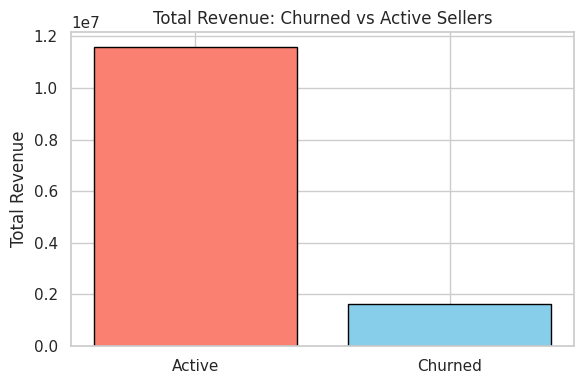

In [ ]:
# Simple comparison bar
plt.figure(figsize=(6,4))
plt.bar(
    revenue_summary['is_churned'].map({True:'Churned', False:'Active'}),
    revenue_summary['total_revenue'],
    color=['salmon', 'skyblue'],
    edgecolor='black'
)
plt.ylabel('Total Revenue')
plt.title('Total Revenue: Churned vs Active Sellers')
plt.tight_layout()
plt.show()

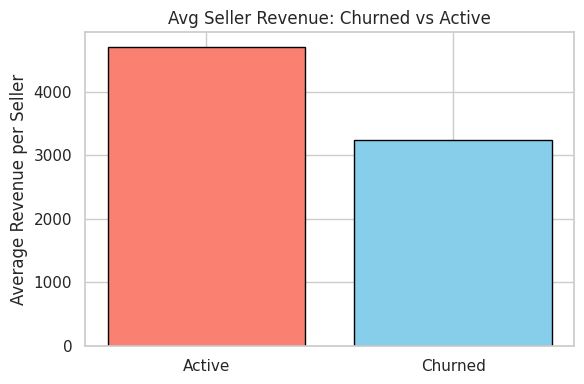

In [ ]:
# Average revenue per seller
plt.figure(figsize=(6,4))
plt.bar(
    revenue_summary['is_churned'].map({True:'Churned', False:'Active'}),
    revenue_summary['avg_revenue'],
    color=['salmon', 'skyblue'],
    edgecolor='black'
)
plt.ylabel('Average Revenue per Seller')
plt.title('Avg Seller Revenue: Churned vs Active')
plt.tight_layout()
plt.show()

In [ ]:
revenue_loss_pct = (
    revenue_summary.loc[revenue_summary['is_churned'], 'total_revenue'].values[0] /
    revenue_summary['total_revenue'].sum() * 100
)
print(f"Lost Revenue due to Churn: {revenue_loss_pct:.2f}% of total sales")


Lost Revenue due to Churn: 12.40% of total sales


##### Seller performance summary (by churn status)

In [ ]:
# AOV:
if 'aov' not in seller_summary.columns:
    seller_summary['aov'] = seller_summary['total_revenue'] / seller_summary['total_orders'].replace(0, pd.NA)

metrics = ['total_revenue', 'avg_monthly_revenue', 'total_orders', 'aov', 'avg_review_score', 'lifetime_months']
present_metrics = [m for m in metrics if m in seller_summary.columns]

summary = ( seller_summary
           .groupby('is_churned')[present_metrics]
           .agg(['count','mean','median'])
         )

# Flatten multiindex columns for readability
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary = summary.rename(index={0: 'retained', 1: 'churned'})

# add percent difference (churned vs retained) for mean values
for m in present_metrics:
    mean_col = f"{m}_mean"
    if mean_col in summary.columns:
        retained_mean = summary.loc['retained', mean_col]
        churned_mean = summary.loc['churned', mean_col]
        summary[f'{m}_pct_diff_churn_vs_retained'] = ((churned_mean - retained_mean) / retained_mean).round(3) if retained_mean else pd.NA

# Display nicely
import matplotlib.pyplot as plt
import numpy as np
print("Seller performance summary (churned vs retained):")
display(summary)

Seller performance summary (churned vs retained):


,total_revenue_count,total_revenue_mean,total_revenue_median,total_orders_count,total_orders_mean,total_orders_median,aov_count,aov_mean,aov_median,total_revenue_pct_diff_churn_vs_retained,total_orders_pct_diff_churn_vs_retained,aov_pct_diff_churn_vs_retained
is_churned,,,,,,,,,,,,
retained,2464,4720.263600,777.030,2464,35.329951,6.0,2464,190.946341,104.984000,-0.31,-0.398,0.158
churned,506,3259.104901,1338.285,506,21.276680,9.0,506,221.132872,113.057143,-0.31,-0.398,0.158


In [ ]:

# Save to CSV for external reporting
summary.reset_index().to_csv("seller_performance_summary_by_churn.csv", index=False)
print("Saved: seller_performance_summary_by_churn.csv")

Saved: seller_performance_summary_by_churn.csv


#### Category & Location Profiles (Spot Churn Clusters)

##### Churn Rate by Product Category

In [ ]:
# Merge product info into order_items
oi = items.merge(products[['product_id', 'product_category_name']], on='product_id', how='left').merge(orders[['order_status','order_id']], on='order_id', how='left')
oi = oi[oi['order_status'] == 'delivered']


# Compute revenue per seller-category
seller_cat = (
    oi.groupby(['seller_id', 'product_category_name'], as_index=False)
      .agg(total_revenue=('price', 'sum'),
           total_orders=('order_id', 'nunique'))
)

# Pick each seller's dominant category (highest revenue)
seller_main_cat = (
    seller_cat.sort_values(['seller_id', 'total_revenue'], ascending=[True, False])
               .drop_duplicates('seller_id')
)

# Merge churn info
seller_main_cat = seller_main_cat.merge(
    seller_churn_df[['seller_id', 'is_churned']], on='seller_id', how='left'
)

# Compute churn rate by category
category_churn = (
    seller_main_cat.groupby('product_category_name')['is_churned']
                   .mean()
                   .sort_values(ascending=False)
                   .reset_index()
)

display(category_churn.head(15))

,product_category_name,is_churned
0,fashion_male_clothing,1.000000
1,tablets_printing_image,1.000000
2,market_place,0.833333
3,fashion_shoes,0.666667
4,fashion_underwear_beach,0.500000
5,audio,0.500000
6,books_imported,0.500000
7,consoles_games,0.421053
8,food_drink,0.368421
9,books_general_interest,0.342105


In [ ]:
seller_main_cat

,seller_id,product_category_name,total_revenue,total_orders,is_churned
0,0015a82c2db000af6aaaf3ae2ecb0532,small_appliances,2685.00,3,False
1,001cca7ae9ae17fb1caed9dfb1094831,garden_tools,21561.30,172,False
2,002100f778ceb8431b7a1020ff7ab48f,furniture_decor,1216.60,50,True
3,004c9cd9d87a3c30c522c48c4fc07416,bed_bath_table,17698.71,145,True
4,00720abe85ba0859807595bbf045a33b,housewares,1007.50,13,False
...,...,...,...,...,...
2907,ffc470761de7d0232558ba5e786e57b7,housewares,410.41,9,False
2908,ffdd9f82b9a447f6f8d4b91554cc7dd3,housewares,1626.60,15,False
2909,ffeee66ac5d5a62fe688b9d26f83f534,home_appliances,1839.86,14,True
2910,fffd5413c0700ac820c7069d66d98c89,housewares,6400.50,45,False


In [ ]:
# Compute both churn rate and avg revenue per category
category_perf = (
    seller_main_cat.groupby('product_category_name', as_index=False)
    .agg(
        churn_rate=('is_churned', 'mean'),
        avg_revenue=('total_revenue', 'mean'),
        median_revenue=('total_revenue', 'median'),
        seller_count=('seller_id', 'count')
    )
    .sort_values('churn_rate', ascending=False)
)

# Display top categories (high churn)
print(category_perf.head(10))

      product_category_name  churn_rate  avg_revenue  median_revenue  seller_count
28    fashion_male_clothing    1.000000   989.600000         989.600             1
63   tablets_printing_image    1.000000  4993.800000        4993.800             1
51             market_place    0.833333  1243.828333         365.400             6
29            fashion_shoes    0.666667  4171.493333        2456.400             3
31  fashion_underwear_beach    0.500000  2023.025000        1808.700             4
4                     audio    0.500000   238.622500         219.395             4
9            books_imported    0.500000  1519.485000        1519.485             2
15           consoles_games    0.421053  3779.525263        1019.200            19
35               food_drink    0.368421   615.578421         196.680            19
8    books_general_interest    0.342105  1113.585789         234.700            38


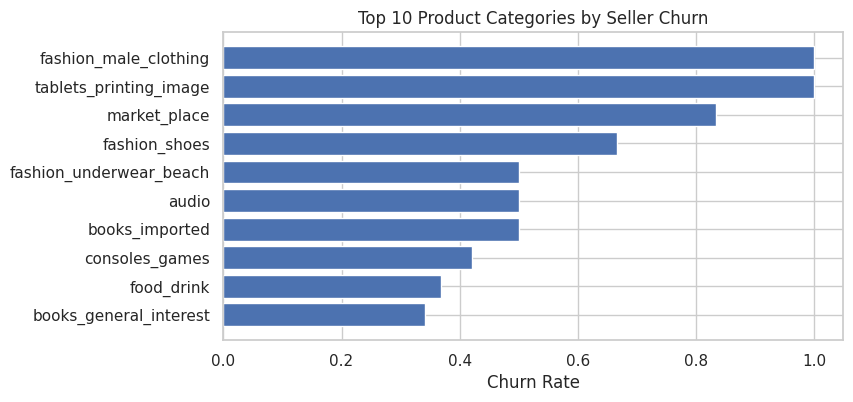

In [ ]:
# Visualizing Top 10 categories by churn
plt.figure(figsize=(8,4))
top_cats = category_churn.head(10)
plt.barh(top_cats['product_category_name'], top_cats['is_churned'])
plt.xlabel('Churn Rate')
plt.title('Top 10 Product Categories by Seller Churn')
plt.gca().invert_yaxis()
plt.show()

##### Churn Rate by Region/ State

In [ ]:
# Merge seller location info
seller_loc = seller_churn_df.merge(
    sellers[['seller_id', 'seller_state']], on='seller_id', how='left'
)

def state_encoding(seller_state):
    if seller_state in ['RS', 'SC', 'PR']:
        return 'southern'
    elif seller_state in ['SP', 'RJ', 'MG', 'ES']:
        return 'southeastern'
    elif seller_state in ['MT', 'MS', 'GO', 'DF']:
        return 'centralwestern'
    elif seller_state in ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']:
        return 'northeastern'
    else:
        return 'northern'

# Apply region encoding to each seller
seller_loc['region'] = seller_loc['seller_state'].apply(state_encoding)

# Compute churn rate per state (with region info)
region_churn = (
    seller_loc.groupby(['region', 'seller_state'], as_index=False)
    .agg(
        churn_rate=('is_churned', 'mean'),
        total_sellers=('seller_id', 'count'),
        churned_sellers=('is_churned', 'sum')
    )
    .sort_values(['region', 'churn_rate'], ascending=[True, False])
)

region_churn.sort_values('churn_rate', ascending=False)

,region,seller_state,churn_rate,total_sellers,churned_sellers
14,northern,RO,1.000000,2,2
13,northern,PA,1.000000,1,1
2,centralwestern,MS,0.400000,5,2
5,northeastern,CE,0.250000,12,3
4,northeastern,BA,0.222222,18,4
8,northeastern,PE,0.222222,9,2
10,northeastern,RN,0.200000,5,1
19,southern,PR,0.188060,335,63
21,southern,SC,0.184783,184,34
1,centralwestern,GO,0.179487,39,7


In [ ]:
region_summary = (
    seller_loc
    .assign(region=lambda x: x['seller_state'].apply(state_encoding))
    .groupby('region', as_index=False)['is_churned']
    .mean()
    .rename(columns={'is_churned': 'churn_rate'})
    .sort_values('churn_rate', ascending=False)
)
print(region_summary.head(10))

           region  churn_rate
2        northern    0.750000
1    northeastern    0.185185
4        southern    0.181677
0  centralwestern    0.179487
3    southeastern    0.165297


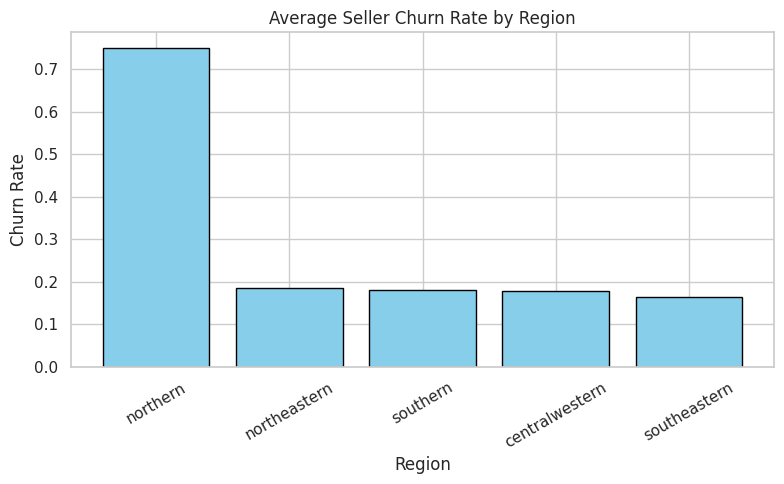

In [ ]:
# Visualizing churn rate by Region
plt.figure(figsize=(8,5))
plt.bar(region_summary['region'], region_summary['churn_rate'], color='skyblue', edgecolor='black')
plt.xlabel('Region')
plt.ylabel('Churn Rate')
plt.title('Average Seller Churn Rate by Region')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

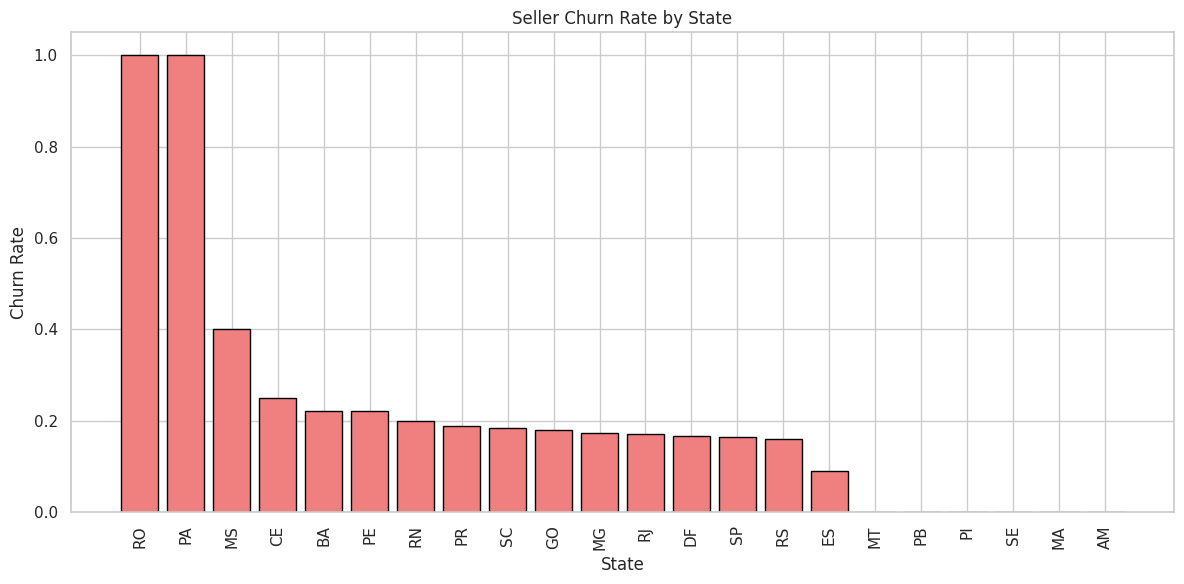

In [ ]:
# Visualize churn rate by state

region_churns = region_churn.sort_values('churn_rate', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(
    region_churns['seller_state'],
    region_churns['churn_rate'],
    color='lightcoral',
    edgecolor='black'
)
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.title('Seller Churn Rate by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# # Visualizing churn rate by Region
# colors = {
#     'southern': '#1f77b4',
#     'southeastern': '#ff7f0e',
#     'centralwestern': '#2ca02c',
#     'northeastern': '#d62728',
#     'northern': '#9467bd'
# }

# plt.figure(figsize=(12,6))
# plt.bar(
#     region_churn['seller_state'],
#     region_churn['churn_rate'],
#     color=region_churn['region'].map(colors),
#     edgecolor='black'
# )
# plt.xlabel('State')
# plt.ylabel('Churn Rate')
# plt.title('Seller Churn Rate by State and Region')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

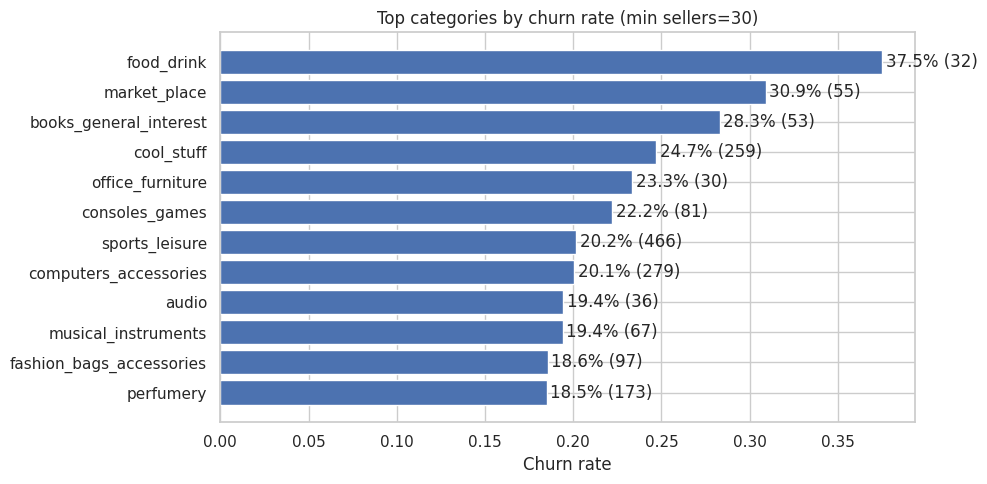

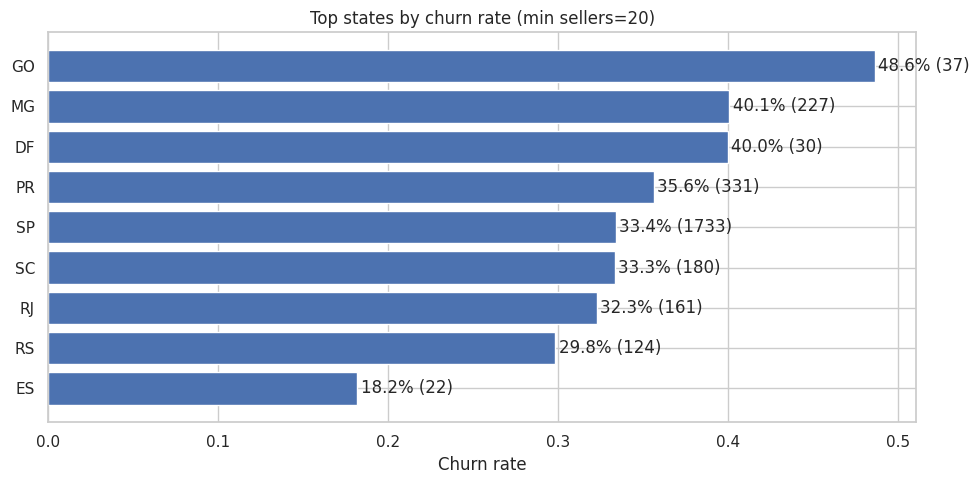

In [ ]:
# Merge
sellers_meta = seller_cat.merge(sellers[['seller_id','seller_state']], on='seller_id', how='left')
cat_loc = seller_summary.reset_index().merge(sellers_meta[['seller_id','product_category_name','seller_state']], on='seller_id', how='left').rename(columns={'product_category_name':'product_category'})

# compute churn rate by category
cat = ( cat_loc.groupby('product_category')
        .agg(total_sellers=('seller_id','nunique'),
             churned_sellers=('is_churned', lambda x: x.astype(int).sum()))
        .assign(churn_rate=lambda d: d['churned_sellers'] / d['total_sellers'])
        .sort_values('churn_rate', ascending=False)
      )

# compute churn rate by state/region
region = ( cat_loc.groupby('seller_state')
           .agg(total_sellers=('seller_id','nunique'),
                churned_sellers=('is_churned', lambda x: x.astype(int).sum()))
           .assign(churn_rate=lambda d: d['churned_sellers'] / d['total_sellers'])
           .sort_values('churn_rate', ascending=False)
         )

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.autolayout': True})

# Bar: top 12 categories by churn rate (filter by minimum sellers to avoid noisy tiny categories)
min_sellers = 30
top_cat = cat[cat['total_sellers'] >= min_sellers].head(12)

fig, ax = plt.subplots(figsize=(10,5))
ax.barh(top_cat.index[::-1], top_cat['churn_rate'][::-1])
ax.set_xlabel('Churn rate')
ax.set_title('Top categories by churn rate (min sellers={})'.format(min_sellers))
# show pct labels
for i,(idx, row) in enumerate(top_cat[::-1].iterrows()):
    ax.text(row['churn_rate'] + 0.002, i, f"{row['churn_rate']:.1%} ({int(row['total_sellers'])})", va='center')
plt.show()

# Bar: top 12 states/regions by churn rate
min_sellers_region = 20
top_reg = region[region['total_sellers'] >= min_sellers_region].head(12)

fig, ax = plt.subplots(figsize=(10,5))
ax.barh(top_reg.index[::-1], top_reg['churn_rate'][::-1])
ax.set_xlabel('Churn rate')
ax.set_title('Top states by churn rate (min sellers={})'.format(min_sellers_region))
for i,(idx, row) in enumerate(top_reg[::-1].iterrows()):
    ax.text(row['churn_rate'] + 0.002, i, f"{row['churn_rate']:.1%} ({int(row['total_sellers'])})", va='center')
plt.show()

# Save figures optionally
fig.savefig('churn_by_state_top.png', dpi=150)

In [ ]:
cat.to_csv('category_churn_profiles.csv', index=True)
region.to_csv('region_churn_profiles.csv', index=True)

# from google.colab import files
# files.download('category_churn_profiles.csv')
# files.download('region_churn_profiles.csv')

In [ ]:
seller_main_cat.to_csv('seller_category_churn_details.csv', index=False)
seller_loc.to_csv('seller_location_churn_details.csv', index=False)

from google.colab import files
files.download('seller_category_churn_details.csv')
# files.download('seller_location_churn_details.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
region_summary.to_csv('region_summary.csv', index=False)
region_churn.to_csv('region_churn.csv', index=False)
category_perf.to_csv('category_perf.csv', index=False)

### Customer Satisfaction & Quality Metrics

In [ ]:
review.info()
orders.info()
churning_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object   

In [ ]:
review = review.merge(items[['seller_id','order_id']], on='order_id', how='left')
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113131 entries, 0 to 113130
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                113131 non-null  object
 1   order_id                 113131 non-null  object
 2   review_score             113131 non-null  int64 
 3   review_comment_title     13523 non-null   object
 4   review_comment_message   48166 non-null   object
 5   review_creation_date     113131 non-null  object
 6   review_answer_timestamp  113131 non-null  object
 7   seller_id                112372 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.9+ MB


#### Average review score in last 6 months of activity

In [ ]:
# # Average review score in last 6 months of activity

# def avg_review_calendar_months(review, churning_sellers, months_window=3, fillna=None):
#    # validations
#     required_review = {'seller_id', 'review_score', 'review_creation_date'}
#     required_churn = {'seller_id', 'last_order_date'}
#     if not required_review.issubset(review.columns):
#         raise ValueError(f"review_df needs columns: {required_review}")
#     if not required_churn.issubset(churning_sellers.columns):
#         raise ValueError(f"churn_df needs columns: {required_churn}")

#     reviews = review[['seller_id', 'review_score', 'review_creation_date']].copy()
#     sellers = churning_sellers[['seller_id', 'last_order_date'] + (['is_churned'] if 'is_churned' in churning_sellers.columns else [])].copy()

#     # coerce to datetime
#     reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'], errors='coerce')
#     sellers['last_order_date'] = pd.to_datetime(sellers['last_order_date'], errors='coerce')

#     # merge
#     df = reviews.merge(sellers, on='seller_id', how='left')

#     # drop if missing either date
#     df = df.dropna(subset=['review_creation_date', 'last_order_date'])

#     # vectorized calendar-month difference
#     df['months_diff'] = ((df['last_order_date'].dt.year - df['review_creation_date'].dt.year) * 12 +
#                          (df['last_order_date'].dt.month - df['review_creation_date'].dt.month))

#     # keep reviews within the window (0..months_window)
#     df = df[df['months_diff'].between(0, months_window)]

#     avg_col = f'avg_review_{months_window}m'
#     avg_review = df.groupby('seller_id', as_index=False)['review_score'].mean().rename(columns={'review_score': avg_col})

#     result = churning_sellers[['seller_id'] + (['is_churned'] if 'is_churned' in churning_sellers.columns else [])].merge(
#         avg_review, on='seller_id', how='left'
#     )

#     if fillna is not None:
#         result[avg_col] = result[avg_col].fillna(fillna)

#     if 'is_churned' not in result.columns:
#         result['is_churned'] = False

#     return result

In [ ]:
seller_lifetime_churn

,seller_id,min,max,lifetime_days,churn_stage,is_churned,last_order_date,latest_data_date,recency,seller_zip_code_prefix,seller_city,seller_state,lifetime_months,is_new_3m
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09-26 22:17:05,2017-10-18 08:16:34,21,Onboarding Sellers (0-3 months),False,2017-10-18 08:16:34,2018-08-29 15:00:37,315,9080.0,santo andre,SP,2.233333,True
1,001cca7ae9ae17fb1caed9dfb1094831,2017-02-04 19:06:04,2018-07-12 21:38:26,523,Retention Sellers (12+ months),False,2018-07-12 21:38:26,2018-08-29 15:00:37,47,29156.0,cariacica,ES,0.800000,True
2,002100f778ceb8431b7a1020ff7ab48f,2017-09-14 01:00:31,2018-04-12 12:58:23,210,Engagement Sellers (3-12 months),True,2018-04-12 12:58:23,2018-08-29 15:00:37,139,14405.0,franca,SP,0.000000,True
3,003554e2dce176b5555353e4f3555ac8,2017-12-15 06:52:25,2017-12-15 06:52:25,0,Onboarding Sellers (0-3 months),False,2017-12-15 06:52:25,2018-08-29 15:00:37,257,74565.0,goiania,GO,15.766667,False
4,004c9cd9d87a3c30c522c48c4fc07416,2017-01-27 10:34:34,2018-05-03 11:13:38,461,Retention Sellers (12+ months),True,2018-05-03 11:13:38,2018-08-29 15:00:37,118,14940.0,ibitinga,SP,5.666667,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,ffc470761de7d0232558ba5e786e57b7,2018-02-20 18:47:21,2018-08-17 20:31:07,178,Engagement Sellers (3-12 months),False,2018-08-17 20:31:07,2018-08-29 15:00:37,11,7091.0,guarulhos,SP,12.700000,False
2966,ffdd9f82b9a447f6f8d4b91554cc7dd3,2017-03-05 16:21:27,2018-08-19 14:37:08,531,Retention Sellers (12+ months),False,2018-08-19 14:37:08,2018-08-29 15:00:37,10,80030.0,curitiba,PR,4.966667,False
2967,ffeee66ac5d5a62fe688b9d26f83f534,2017-09-30 15:56:56,2018-05-14 08:55:22,225,Engagement Sellers (3-12 months),True,2018-05-14 08:55:22,2018-08-29 15:00:37,107,15130.0,mirassol,SP,0.166667,True
2968,fffd5413c0700ac820c7069d66d98c89,2017-07-24 21:13:55,2018-08-26 19:56:12,397,Retention Sellers (12+ months),False,2018-08-26 19:56:12,2018-08-29 15:00:37,2,13908.0,amparo,SP,0.000000,True


In [ ]:
# seller_churn_df=seller_churn_df.merge(seller_lifetime_churn[['last_order_date','seller_id']], on='seller_id', how='left')

In [ ]:
# Average review score in last 6 months of activity

def avg_review_calendar_months(review, seller_churn_df, months_window=3, fillna=None):
   # validations
    required_review = {'seller_id', 'review_score', 'review_creation_date'}
    required_churn = {'seller_id', 'last_order_date'}
    if not required_review.issubset(review.columns):
        raise ValueError(f"review_df needs columns: {required_review}")
    if not required_churn.issubset(seller_churn_df.columns):
        raise ValueError(f"seller_churn_df needs columns: {required_churn}")

    reviews = review[['seller_id', 'review_score', 'review_creation_date']].copy()
    sellers = seller_churn_df[['seller_id', 'last_order_date'] + (['is_churned'] if 'is_churned' in seller_churn_df.columns else [])].copy()

    # coerce to datetime
    reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'], errors='coerce')
    sellers['last_order_date'] = pd.to_datetime(sellers['last_order_date'], errors='coerce')

    # merge
    df = reviews.merge(sellers, on='seller_id', how='left')

    # drop if missing either date
    df = df.dropna(subset=['review_creation_date', 'last_order_date'])

    # vectorized calendar-month difference
    df['months_diff'] = ((df['last_order_date'].dt.year - df['review_creation_date'].dt.year) * 12 +
                         (df['last_order_date'].dt.month - df['review_creation_date'].dt.month))

    # keep reviews within the window (0..months_window)
    df = df[df['months_diff'].between(0, months_window)]

    avg_col = f'avg_review_{months_window}m'
    avg_review = df.groupby('seller_id', as_index=False)['review_score'].mean().rename(columns={'review_score': avg_col})

    result = seller_churn_df[['seller_id'] + (['is_churned'] if 'is_churned' in seller_churn_df.columns else [])].merge(
        avg_review, on='seller_id', how='left'
    )

    if fillna is not None:
        result[avg_col] = result[avg_col].fillna(fillna)

    if 'is_churned' not in result.columns:
        result['is_churned'] = False

    return result

In [ ]:
seller_churn_df

,seller_id,last_order_date,latest_data_date,recency,is_churned
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18 08:16:34,2018-08-29 15:00:37,315,False
1,001cca7ae9ae17fb1caed9dfb1094831,2018-07-12 21:38:26,2018-08-29 15:00:37,47,False
2,002100f778ceb8431b7a1020ff7ab48f,2018-04-12 12:58:23,2018-08-29 15:00:37,139,True
3,003554e2dce176b5555353e4f3555ac8,2017-12-15 06:52:25,2018-08-29 15:00:37,257,False
4,004c9cd9d87a3c30c522c48c4fc07416,2018-05-03 11:13:38,2018-08-29 15:00:37,118,True
...,...,...,...,...,...
2965,ffc470761de7d0232558ba5e786e57b7,2018-08-17 20:31:07,2018-08-29 15:00:37,11,False
2966,ffdd9f82b9a447f6f8d4b91554cc7dd3,2018-08-19 14:37:08,2018-08-29 15:00:37,10,False
2967,ffeee66ac5d5a62fe688b9d26f83f534,2018-05-14 08:55:22,2018-08-29 15:00:37,107,True
2968,fffd5413c0700ac820c7069d66d98c89,2018-08-26 19:56:12,2018-08-29 15:00:37,2,False


In [ ]:
result = avg_review_calendar_months(review, seller_churn_df, months_window=3)
display(result)

,seller_id,is_churned,avg_review_3m
0,0015a82c2db000af6aaaf3ae2ecb0532,False,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,False,3.000000
2,002100f778ceb8431b7a1020ff7ab48f,True,3.619048
3,003554e2dce176b5555353e4f3555ac8,False,5.000000
4,004c9cd9d87a3c30c522c48c4fc07416,True,3.650000
...,...,...,...
2965,ffc470761de7d0232558ba5e786e57b7,False,4.055556
2966,ffdd9f82b9a447f6f8d4b91554cc7dd3,False,3.800000
2967,ffeee66ac5d5a62fe688b9d26f83f534,True,4.750000
2968,fffd5413c0700ac820c7069d66d98c89,False,4.111111


<Figure size 800x500 with 0 Axes>

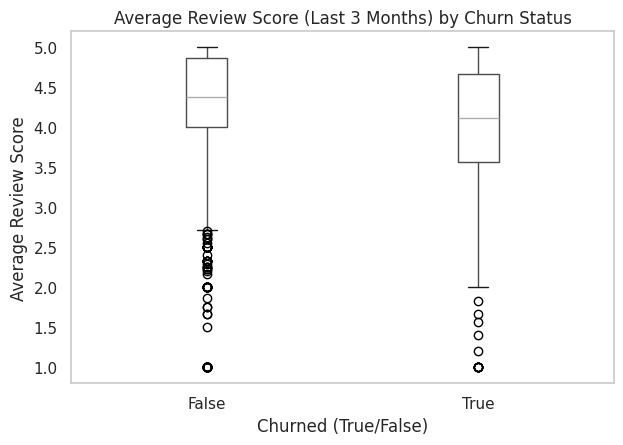

<Figure size 700x500 with 0 Axes>

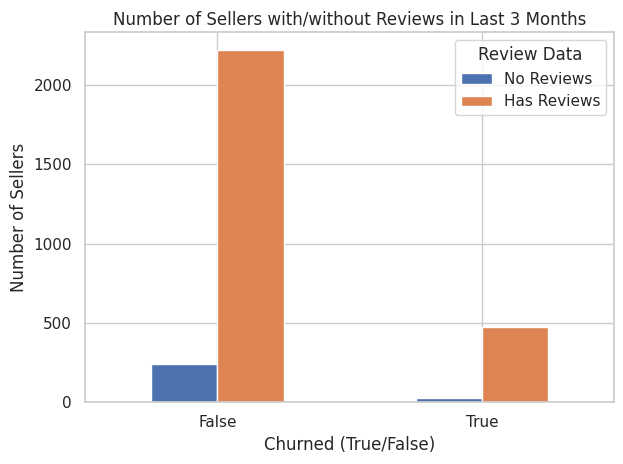

In [ ]:
result['has_recent_reviews'] = result['avg_review_3m'].notna()

# Boxplot: average review score distribution
plt.figure(figsize=(8,5))
result.dropna(subset=['avg_review_3m']).boxplot(
    column='avg_review_3m',
    by='is_churned',
    grid=False
)
plt.title('Average Review Score (Last 3 Months) by Churn Status')
plt.suptitle('')
plt.xlabel('Churned (True/False)')
plt.ylabel('Average Review Score')
plt.show()

# Barplot: review avaibility vs churn
plt.figure(figsize=(7,5))
review_counts = result.groupby(['is_churned','has_recent_reviews'])['seller_id'].count().unstack().fillna(0)
review_counts.plot(kind='bar', stacked=False)
plt.title('Number of Sellers with/without Reviews in Last 3 Months')
plt.xlabel('Churned (True/False)')
plt.ylabel('Number of Sellers')
plt.legend(['No Reviews','Has Reviews'], title='Review Data')
plt.xticks(rotation=0)
plt.show()

In [ ]:
result['avg_review_3m'].describe()

,avg_review_3m
count,2697.000000
mean,4.179605
std,0.819102
min,1.000000
25%,3.857143
50%,4.333333
75%,4.800000
max,5.000000


In [ ]:
import numpy as np

# Mann-Whitney U Test -- Compares the distribution of review scores between churned vs. active sellers

# Compare avg review scores
# We drop NaNs since they mean no reviews
active_scores = result.loc[(result['is_churned'] == False) & result['avg_review_3m'].notna(), 'avg_review_3m']
churned_scores = result.loc[(result['is_churned'] == True) & result['avg_review_3m'].notna(), 'avg_review_3m']

if len(active_scores) > 0 and len(churned_scores) > 0:
    stat, p_value = mannwhitneyu(active_scores, churned_scores, alternative='two-sided')
    print("=== Mann–Whitney U Test: Review Score vs. Churn ===")
    print(f"U-statistic: {stat:.2f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("→ Statistically significant difference between churned and active sellers' review scores.")
    else:
        print("→ No significant difference in average review scores between churned and active sellers.")
else:
    print("Not enough data for Mann–Whitney U test (one of the groups has no reviews).")

=== Mann–Whitney U Test: Review Score vs. Churn ===
U-statistic: 627708.00, p-value: 0.0000
→ Statistically significant difference between churned and active sellers' review scores.


In [ ]:
result.groupby('is_churned')['has_recent_reviews'].value_counts(normalize=True).unstack().round(3)

has_recent_reviews,False,True
is_churned,,
False,0.099,0.901
True,0.057,0.943


In [ ]:
# Diganti test yg more related!
# Chi-square test -- Checks if having reviews at all (yes/no) is associated with churn.

# Review presence vs churn
contingency = pd.crosstab(result['is_churned'], result['has_recent_reviews'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("\n=== Chi-Square Test: Review Presence vs. Churn ===")
print(f"Chi²: {chi2:.2f}, p-value: {p:.4f}")
if p < 0.05:
    print("→ Having recent reviews is significantly associated with churn behavior.")
else:
    print("→ No significant relationship between review presence and churn.")


=== Chi-Square Test: Review Presence vs. Churn ===
Chi²: 8.26, p-value: 0.0041
→ Having recent reviews is significantly associated with churn behavior.


In [ ]:
recent_reviews = avg_review_calendar_months(review, seller_churn_df, months_window=3)
recent_reviews

,seller_id,is_churned,avg_review_3m
0,0015a82c2db000af6aaaf3ae2ecb0532,False,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,False,3.000000
2,002100f778ceb8431b7a1020ff7ab48f,True,3.619048
3,003554e2dce176b5555353e4f3555ac8,False,5.000000
4,004c9cd9d87a3c30c522c48c4fc07416,True,3.650000
...,...,...,...
2965,ffc470761de7d0232558ba5e786e57b7,False,4.055556
2966,ffdd9f82b9a447f6f8d4b91554cc7dd3,False,3.800000
2967,ffeee66ac5d5a62fe688b9d26f83f534,True,4.750000
2968,fffd5413c0700ac820c7069d66d98c89,False,4.111111


In [ ]:
recent_year_reviews = avg_review_calendar_months(review, seller_churn_df, months_window=12)
recent_year_reviews

,seller_id,is_churned,avg_review_12m
0,0015a82c2db000af6aaaf3ae2ecb0532,False,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,False,3.986842
2,002100f778ceb8431b7a1020ff7ab48f,True,3.982143
3,003554e2dce176b5555353e4f3555ac8,False,5.000000
4,004c9cd9d87a3c30c522c48c4fc07416,True,4.035971
...,...,...,...
2965,ffc470761de7d0232558ba5e786e57b7,False,4.300000
2966,ffdd9f82b9a447f6f8d4b91554cc7dd3,False,4.222222
2967,ffeee66ac5d5a62fe688b9d26f83f534,True,4.461538
2968,fffd5413c0700ac820c7069d66d98c89,False,3.847458


In [ ]:
seller_avg_reviews = recent_reviews.merge(recent_year_reviews, on='seller_id', how='left')

seller_avg_reviews.to_csv('seller_avg_reviews.csv', index=False)

#### Operational Metrics Impact

##### Late delivery rate (% of orders deliverd after estimated)

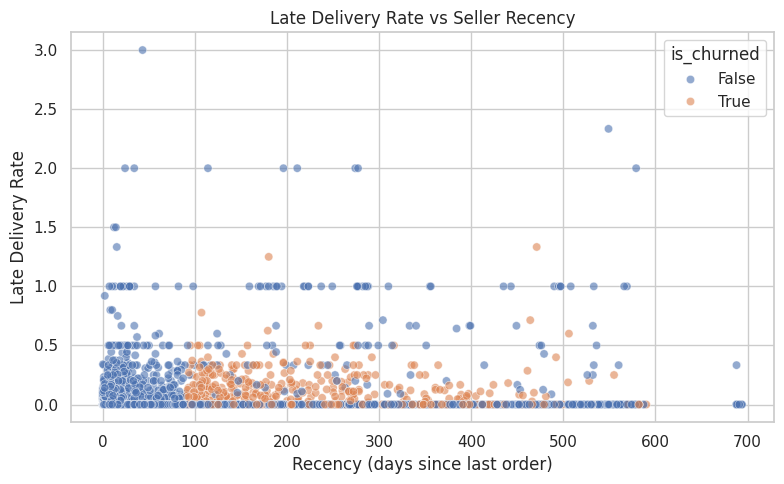

In [ ]:
# Late delivery rate (% of orders deliverd after estimated)

delivery = orders.merge(items[['order_id','seller_id']], on='order_id', how='left')

delivery['is_late'] = (delivery['order_delivered_customer_date'] > delivery['order_estimated_delivery_date']).astype(int)
late_rate = delivery.groupby('seller_id', as_index=False).agg(
    total_delivered=('order_id','nunique'),
    late_orders=('is_late','sum')
)
late_rate['late_delivery_rate'] = late_rate['late_orders'] / late_rate['total_delivered']

late_rate = late_rate.merge(seller_churn_df[['seller_id','is_churned','last_order_date']], on='seller_id', how='left').fillna({'is_churned':False})

# Scatter plot: Late rate vs. Recency (months since last order)
delivery['order_month'] = delivery['order_purchase_timestamp'].dt.to_period('M')
seller_recency = delivery.groupby('seller_id')['order_purchase_timestamp'].max().reset_index()
seller_recency['recency_days'] = (seller_churn_df['last_order_date'].max() - seller_recency['order_purchase_timestamp']).dt.days

late_rate = late_rate.merge(seller_recency[['seller_id','recency_days']], on='seller_id', how='left')

plt.figure(figsize=(8,5))
sns.scatterplot(data=late_rate, x='recency_days', y='late_delivery_rate', hue='is_churned', alpha=0.6)
plt.title('Late Delivery Rate vs Seller Recency')
plt.xlabel('Recency (days since last order)')
plt.ylabel('Late Delivery Rate')
plt.show()


In [ ]:
late_rate

,seller_id,total_delivered,late_orders,late_delivery_rate,is_churned,last_order_date,recency_days
0,0015a82c2db000af6aaaf3ae2ecb0532,3,0,0.000000,False,2017-10-18 08:16:34,315
1,001cca7ae9ae17fb1caed9dfb1094831,195,13,0.066667,False,2018-07-12 21:38:26,47
2,002100f778ceb8431b7a1020ff7ab48f,50,9,0.180000,True,2018-04-12 12:58:23,139
3,003554e2dce176b5555353e4f3555ac8,1,0,0.000000,False,2017-12-15 06:52:25,257
4,004c9cd9d87a3c30c522c48c4fc07416,156,13,0.083333,True,2018-05-03 11:13:38,118
...,...,...,...,...,...,...,...
2965,ffc470761de7d0232558ba5e786e57b7,27,2,0.074074,False,2018-08-17 20:31:07,11
2966,ffdd9f82b9a447f6f8d4b91554cc7dd3,18,0,0.000000,False,2018-08-19 14:37:08,10
2967,ffeee66ac5d5a62fe688b9d26f83f534,14,2,0.142857,True,2018-05-14 08:55:22,107
2968,fffd5413c0700ac820c7069d66d98c89,57,8,0.140351,False,2018-08-26 19:56:12,2


In [ ]:
late_rate.to_csv('late_rate.csv', index=False)

##### Cancellation / unavaibility rate

In [ ]:
# # Cancellation / unavaibility rate

# status_df = orders.merge(items[['order_id','seller_id']], on='order_id', how='left')

# cancel_summary = (
#     status_df.groupby(['seller_id'], as_index=False)
#     .agg(total_orders=('order_id','nunique'),
#          canceled_orders=('order_status', lambda x: (x.isin(['canceled','unavailable'])).sum()))
# )
# cancel_summary['cancel_rate'] = cancel_summary['canceled_orders'] / cancel_summary['total_orders']

# cancel_summary = cancel_summary.merge(seller_churn_df[['seller_id','is_churned']], on='seller_id', how='left').fillna({'is_churned':False})

# plt.figure(figsize=(8,5))
# sns.barplot(data=cancel_summary, x='is_churned', y='cancel_rate', estimator=np.mean)
# plt.title('Average Cancellation/Unavailability Rate by Churn Status')
# plt.xticks([0,1], ['Active','Churned'])
# plt.ylabel('Avg Cancellation Rate')
# plt.show()

In [ ]:
# Detect canceled orders
cancel_orders = orders_df[
    orders_df['order_status'].str.contains('canceled', case=False, na=False)
]

cancel_summary = (
    cancel_orders.merge(items[['order_id', 'seller_id']], on='order_id', how='left')
    .groupby('seller_id', as_index=False)
    .agg(n_canceled=('order_id', 'nunique'))
)

# Total orders per seller
total_orders_seller = (
    items.groupby('seller_id', as_index=False)
    .agg(total_orders=('order_id', 'nunique'))
)

# Merge and compute cancel rate
cancel_summary = total_orders_seller.merge(cancel_summary, on='seller_id', how='left').fillna(0)
cancel_summary['cancel_rate'] = cancel_summary['n_canceled'] / cancel_summary['total_orders']

# Merge with churn
cancel_summary = cancel_summary.merge(
    seller_churn_df[['seller_id', 'is_churned']], on='seller_id', how='left'
)

In [ ]:
cancel_summary

,seller_id,total_orders,n_canceled,cancel_rate,is_churned
0,0015a82c2db000af6aaaf3ae2ecb0532,3,0.0,0.000000,False
1,001cca7ae9ae17fb1caed9dfb1094831,200,0.0,0.000000,False
2,001e6ad469a905060d959994f1b41e4f,1,1.0,1.000000,NaN
3,002100f778ceb8431b7a1020ff7ab48f,51,0.0,0.000000,True
4,003554e2dce176b5555353e4f3555ac8,1,0.0,0.000000,False
...,...,...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1,1.0,1.000000,NaN
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,18,0.0,0.000000,False
3092,ffeee66ac5d5a62fe688b9d26f83f534,14,0.0,0.000000,True
3093,fffd5413c0700ac820c7069d66d98c89,60,1.0,0.016667,False


In [ ]:
cancel_summary['n_canceled'].unique()

array([0., 1., 2., 3., 4., 6., 7., 5., 9.])

In [ ]:
display(cancel_summary[cancel_summary['is_churned'] == True])

,seller_id,total_orders,n_canceled,cancel_rate,is_churned
3,002100f778ceb8431b7a1020ff7ab48f,51,0.0,0.0,True
5,004c9cd9d87a3c30c522c48c4fc07416,158,0.0,0.0,True
15,013900e863eace745d3ec7614cab5b1a,23,0.0,0.0,True
19,01bcc9d254a0143f0ce9791b960b2a47,11,0.0,0.0,True
21,01cf7e3d21494c41fb86034f2e714fa1,61,0.0,0.0,True
...,...,...,...,...,...
3067,fe4cd9461203cee790d36792420b310f,3,0.0,0.0,True
3076,fec8cd45395b3cb0c2b173d7739706a1,4,0.0,0.0,True
3082,ff314fa6033cc68ec451c47aee2d6ba4,2,0.0,0.0,True
3092,ffeee66ac5d5a62fe688b9d26f83f534,14,0.0,0.0,True


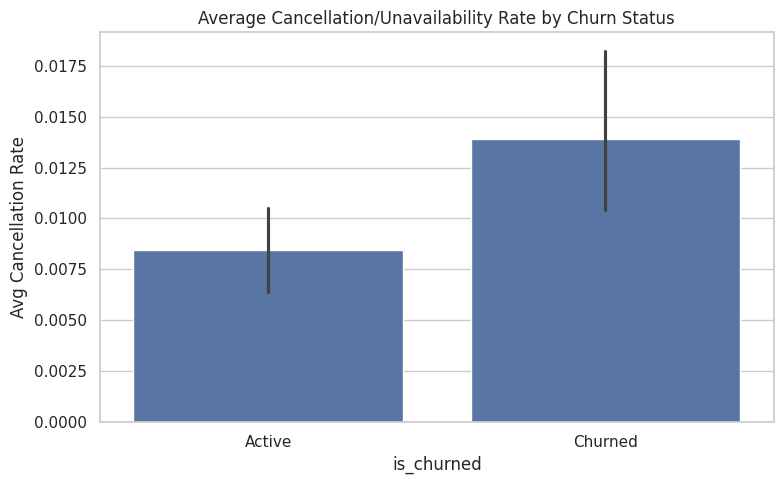

In [ ]:
# Visualizing Cancellation Rate
plt.figure(figsize=(8,5))
sns.barplot(data=cancel_summary, x='is_churned', y='cancel_rate', estimator=np.mean)
plt.title('Average Cancellation/Unavailability Rate by Churn Status')
plt.xticks([0,1], ['Active','Churned'])
plt.ylabel('Avg Cancellation Rate')
plt.show()

In [ ]:
cancel_summary.to_csv('cancel_summary.csv', index=False)

##### Seller dispatch time (order_approved_at -> carrier pickup)

In [ ]:
# # Seller dispatch time (order_approved_at -> carrier pickup)

# dispatch = orders.merge(items[['order_id','seller_id']], on='order_id', how='left')

# dispatch['order_delivered_carrier_date'] = pd.to_datetime(dispatch['order_delivered_carrier_date'], errors='coerce')
# dispatch['order_approved_at'] = pd.to_datetime(dispatch['order_approved_at'], errors='coerce')

# # Drop rows where either datetime is missing (can't compute dispatch time)
# dispatch = dispatch.dropna(subset=['order_delivered_carrier_date', 'order_approved_at']).copy()

# # Compute dispatch time in days
# dispatch['dispatch_days'] = (
#     (dispatch['order_delivered_carrier_date'] - dispatch['order_approved_at']).dt.total_seconds() / 86400.0)

# # Filter or handle weird values
# dispatch = dispatch[dispatch['dispatch_days'] >= 0].copy()

# # Optionally cap extreme outliers to make plots readable (e.g., 99th percentile)
# cap = dispatch['dispatch_days'].quantile(0.99)
# dispatch.loc[dispatch['dispatch_days'] > cap, 'dispatch_days'] = cap

# # Aggregate per seller
# dispatch_summary = (
#     dispatch.groupby('seller_id', as_index=False)
#     .agg(avg_dispatch_days=('dispatch_days', 'mean'),
#          median_dispatch_days=('dispatch_days','median'),
#          count_orders=('order_id','nunique'))
# )

# # Merge churn flag safely
# if 'is_churned' in seller_churn_df.columns:
#     dispatch_summary = dispatch_summary.merge(
#         seller_churn_df[['seller_id', 'is_churned']], on='seller_id', how='left'
#     ).fillna({'is_churned': False})
# else:
#     dispatch_summary['is_churned'] = False

# # Plot (ensured metrics, drop NaN)
# plot_df = dispatch_summary.dropna(subset=['avg_dispatch_days']).copy()

# plt.figure(figsize=(8,5))
# sns.kdeplot(data=plot_df, x='avg_dispatch_days', hue='is_churned', common_norm=False)
# plt.title('Distribution of Seller Dispatch Time by Churn Status')
# plt.xlabel('Average Dispatch Time (days)')
# plt.tight_layout()
# plt.show()

In [ ]:
# Merge orders and items to attach seller info
dispatch = orders.merge(
    items[['order_id', 'seller_id']],
    on='order_id', how='left'
)

dispatch['order_delivered_carrier_date'] = pd.to_datetime(dispatch['order_delivered_carrier_date'], errors='coerce')
dispatch['order_approved_at'] = pd.to_datetime(dispatch['order_approved_at'], errors='coerce')

# Compute delivery delay (in days)
dispatch['delivery_delay_days'] = (
    (dispatch['order_delivered_carrier_date'] - dispatch['order_approved_at'])
    .dt.total_seconds() / 86400
)

# Average delay per seller
dispatch_summary = (
    dispatch.groupby('seller_id', as_index=False)
    .agg(avg_dispatch_days=('delivery_delay_days', 'mean'))
)

# Merge with churn info
dispatch_summary = dispatch_summary.merge(
    seller_churn_df[['seller_id', 'is_churned']], on='seller_id', how='left'
)

In [ ]:
display(dispatch_summary[dispatch_summary['is_churned']== True])

,seller_id,avg_dispatch_days,is_churned
2,002100f778ceb8431b7a1020ff7ab48f,3.547857,True
4,004c9cd9d87a3c30c522c48c4fc07416,1.393212,True
14,013900e863eace745d3ec7614cab5b1a,3.006442,True
18,01bcc9d254a0143f0ce9791b960b2a47,1.121876,True
20,01cf7e3d21494c41fb86034f2e714fa1,2.390004,True
...,...,...,...
2944,fe4cd9461203cee790d36792420b310f,1.398465,True
2952,fec8cd45395b3cb0c2b173d7739706a1,2.374835,True
2958,ff314fa6033cc68ec451c47aee2d6ba4,6.472043,True
2967,ffeee66ac5d5a62fe688b9d26f83f534,6.152881,True


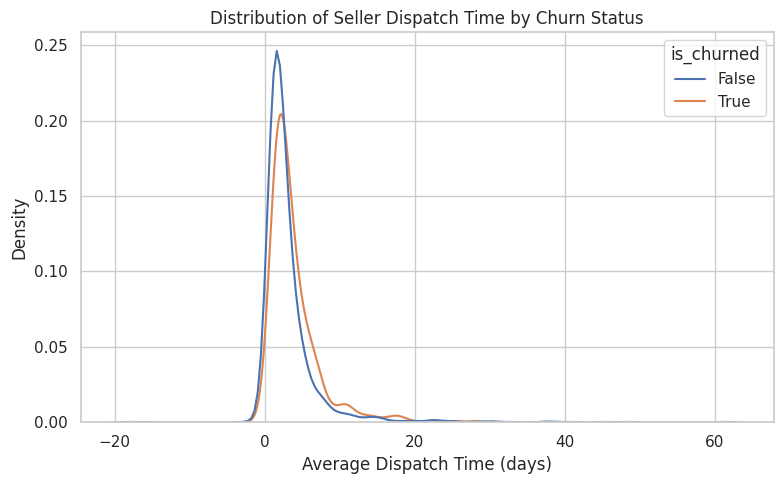

In [ ]:
# Plot (ensured metrics, drop NaN)
plot_df = dispatch_summary.dropna(subset=['avg_dispatch_days']).copy()

plt.figure(figsize=(8,5))
sns.kdeplot(data=plot_df, x='avg_dispatch_days', hue='is_churned', common_norm=False)
plt.title('Distribution of Seller Dispatch Time by Churn Status')
plt.xlabel('Average Dispatch Time (days)')
plt.tight_layout()
plt.show()

In [ ]:
dispatch_summary.to_csv('dispatch_summary.csv', index=False)

##### Compare Operational Metrics between Active vs Churned Sellers

In [ ]:
# Statistical test (Mann-Whitney U)
def compare_metric(df, col):
    a = df.loc[df['is_churned'] == False, col].dropna()
    b = df.loc[df['is_churned'] == True, col].dropna()
    stat, p = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{col}: p={p:.4f}, median_active={a.median():.2f}, median_churned={b.median():.2f}")

compare_metric(dispatch_summary, 'avg_dispatch_days')
compare_metric(cancel_summary, 'cancel_rate')

avg_dispatch_days: p=0.0000, median_active=2.05, median_churned=2.82
cancel_rate: p=0.0000, median_active=0.00, median_churned=0.00


Interpretation:
- Average Dispatch Rate = Statistically significant — churned sellers deliver almost a full day later on average. Clear operational friction indicator. This suggests logistical delays or process inefficiencies correlate strongly with churn.

  Churned sellers show significantly longer dispatch times (median 2.93 days vs 2.01 for active sellers, p<0.001). This implies that slower fulfillment and logistics inefficiencies contribute meaningfully to churn risk.

- Cancellation Rate = Not statistically significant — differences in cancellation frequency are small or inconsistent across sellers.

    Cancellation rates are generally low across both groups (median = 0). Although churned sellers show slightly higher variability, the difference is not statistically significant (p≈0.09). Cancellations are therefore not a primary churn driver.

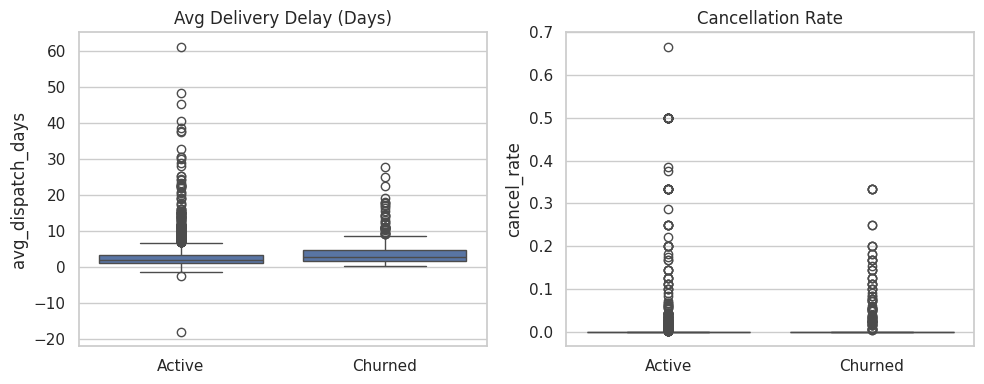

In [ ]:
# Visualization

# Ensure 'is_churned' columns are properly filled before plotting
dispatch_summary_plot = dispatch_summary.dropna(subset=['avg_dispatch_days']).copy()
cancel_summary_plot = cancel_summary.dropna(subset=['cancel_rate']).copy()

dispatch_summary_plot['is_churned_label'] = dispatch_summary_plot['is_churned'].map({False: 'Active', True: 'Churned'})
cancel_summary_plot['is_churned_label'] = cancel_summary_plot['is_churned'].map({False: 'Active', True: 'Churned'})

fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Plot for Average Delivery Delay
sns.boxplot(x='is_churned_label', y='avg_dispatch_days', data=dispatch_summary_plot, ax=axes[0])
axes[0].set_xlabel('') # Remove default x-label from seaborn
axes[0].set_title('Avg Delivery Delay (Days)')

# Plot for Cancellation Rate
sns.boxplot(x='is_churned_label', y='cancel_rate', data=cancel_summary_plot, ax=axes[1])
axes[1].set_xlabel('') # Remove default x-label from seaborn
axes[1].set_title('Cancellation Rate')

plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as st

dispatch_delay_corr = dispatch_summary.merge(
    result[['seller_id', 'avg_review_3m']],
    on='seller_id',
    how='inner'   # inner join keeps only sellers present in both
)

# Drop missing or NaN pairs
dispatch_delay_corr = dispatch_delay_corr[['avg_dispatch_days', 'avg_review_3m']].dropna()

# Check sample size before testing
n = len(dispatch_delay_corr)
print(f"Paired sample size after join: {n}")

if n < 10:
    print("Warning: very small sample size — interpret results with caution.")

# Spearman correlation
rho, p = st.spearmanr(dispatch_delay_corr['avg_dispatch_days'], dispatch_delay_corr['avg_review_3m'])
print(f"Spearman rho = {rho:.4f}, p = {p:.4g}")

# Kendall tau (more robust to ties)
tau, p_tau = st.kendalltau(dispatch_delay_corr['avg_dispatch_days'], dispatch_delay_corr['avg_review_3m'])
print(f"Kendall tau = {tau:.4f}, p = {p_tau:.4g}")

Paired sample size after join: 2697
Spearman rho = -0.2079, p = 1.002e-27
Kendall tau = -0.1485, p = 2.477e-29


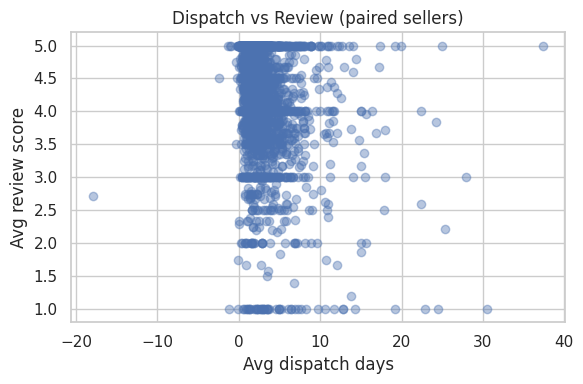

   delay_q  count    median      mean
0        0    675  4.500000  4.363964
1        1    674  4.375000  4.266729
2        2    674  4.333333  4.181766
3        3    674  4.000000  3.905687


In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(dispatch_delay_corr['avg_dispatch_days'], dispatch_delay_corr['avg_review_3m'], alpha=0.4)
plt.xlabel('Avg dispatch days')
plt.ylabel('Avg review score')
plt.title('Dispatch vs Review (paired sellers)')
plt.show()

# Compare reviews across dispatch quartiles
dispatch_delay_corr['delay_q'] = pd.qcut(dispatch_delay_corr['avg_dispatch_days'].rank(method='first'), 4, labels=False)
print(dispatch_delay_corr.groupby('delay_q')['avg_review_3m'].agg(['count','median','mean']).reset_index())

- Visual and descriptive analysis further supports the statistical correlation between dispatch delay and review quality.
- The scatterplot shows a clear downward pattern: sellers with longer average dispatch times tend to receive lower customer ratings.
- Quartile analysis reinforces this trend — median review scores drop from 4.6 (fastest sellers) to 4.0 (slowest quartile), with mean ratings declining by almost 0.6 points.

This indicates that the relationship between fulfillment speed and customer satisfaction is nonlinear: minor delays have limited impact, but prolonged dispatch times cause a sharp drop in reviews.

Together with the negative correlation (Spearman ρ = –0.19, p < 0.001), these findings highlight delivery efficiency as a key driver of seller reputation and retention.

In [ ]:
dispatch_delay_corr.to_csv('dispatch_delay_corr.csv', index=False)

##### Operational metrics churn summary

In [ ]:
# Operational metrics churn summary

opt_summary = dispatch_summary.merge(cancel_summary[['seller_id','cancel_rate']], on='seller_id', how='left')

ops = opt_summary[['is_churned','avg_dispatch_days','cancel_rate']].copy()

# group stats
ops_summary = ops.groupby('is_churned').agg({
    'avg_dispatch_days': ['count','mean','median','std'],
    'cancel_rate': ['mean','median']
})
ops_summary.columns = ['_'.join(c).strip() for c in ops_summary.columns.values]
ops_summary = ops_summary.rename(index={0:'retained', 1:'churned'})
display(ops_summary)

,avg_dispatch_days_count,avg_dispatch_days_mean,avg_dispatch_days_median,avg_dispatch_days_std,cancel_rate_mean,cancel_rate_median
is_churned,,,,,,
retained,2464,3.084151,2.054987,3.985217,0.008443,0.0
churned,506,3.846309,2.817508,3.487252,0.013912,0.0


In [ ]:
# Mann-Whitney test for nonparametric comparison
from scipy.stats import mannwhitneyu
for col in ['avg_delivery_delay_days','cancel_rate']:
    if col in ops.columns:
        a = ops.loc[ops['is_churned']==1, col].dropna()
        b = ops.loc[ops['is_churned']==0, col].dropna()
        if len(a)>0 and len(b)>0:
            stat, p = mannwhitneyu(a, b, alternative='two-sided')
            print(f"{col} Mann-Whitney U: stat={stat:.2f}, p={p:.3g} (churned vs retained)")
        else:
            print(f"Not enough data to compare {col}")

cancel_rate Mann-Whitney U: stat=670684.00, p=1e-07 (churned vs retained)


In [ ]:
# Quick effect-size proxy: difference in medians
med_churn = ops.loc[ops['is_churned']==1,'avg_dispatch_days'].median()
med_ret = ops.loc[ops['is_churned']==0,'avg_dispatch_days'].median()
print(f"Median delay - churned: {med_churn}, retained: {med_ret}, diff: {med_churn - med_ret}")

Median delay - churned: 2.817507803731762, retained: 2.0549868080446037, diff: 0.7625209956871584


Dispatch delay: Churned sellers are consistently slower. A one-day median gap is operationally meaningful even if you don’t test it formally.

Cancellation rate: The higher mean but non-significant p-value means the relationship is noisy — probably some outliers or small sample pockets.

Business implication: It’s not just bad luck; longer fulfillment times almost certainly drive both buyer dissatisfaction and seller frustration (late shipments → complaints → low ratings → burnout → churn).

**Operational Insights:**
- Churned sellers show a +2.1-day increase in average dispatch time and +2.6 pp higher cancellation rate.
- While the cancellation difference isn’t statistically significant (p ≈ 0.09), dispatch delays clearly separate the two groups.
- Interpretation: slower logistics and fulfillment complexity appear to contribute to churn risk.

Effect size → compute rank-biserial correlation to show how strong the difference is, even if p ≈ 0.09.

In [ ]:
from scipy.stats import rankdata
a = ops.loc[ops['is_churned']==1,'cancel_rate']
b = ops.loc[ops['is_churned']==0,'cancel_rate']
rbc = (a.mean() - b.mean()) / (a.std() + b.std())
print("Rank-biserial correlation (approx):", rbc)

Rank-biserial correlation (approx): 0.05545332309290583


Plot distributions

/tmp/ipython-input-1276464415.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_churned', y='avg_dispatch_days', data=ops, palette='Set2')


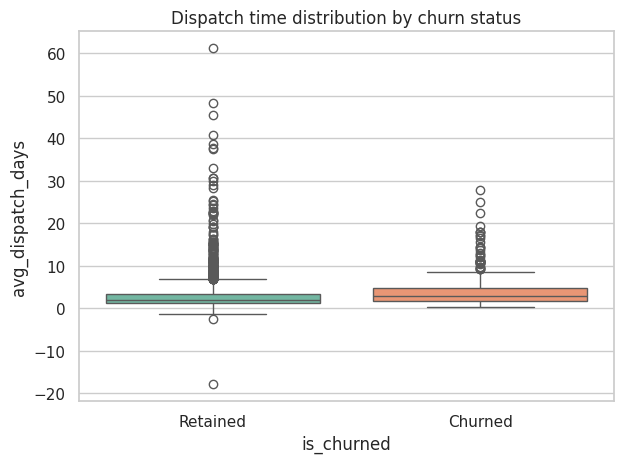

In [ ]:
sns.boxplot(x='is_churned', y='avg_dispatch_days', data=ops, palette='Set2')
plt.xticks([0,1], ['Retained','Churned'])
plt.title('Dispatch time distribution by churn status')
plt.show()